# The Effect of COVID-19 on U.S. Mobility: An Analysis of Google Community Mobility Reports

## Abstract
This study investigates the impact of the COVID-19 pandemic on mobility patterns in the United States using Google Community Mobility Reports. The research employs descriptive statistics, time-series analysis, and regression models to analyze the data. In order to understand the mechanism of epidemic spread on the community mobility, we modelled the demand-service relationship using the DQQ model which analyze disruptions and recoveries in complex systems in different contexts. The model can help decision-makers and practitioners develop strategies to mitigate the impact of disruptions, improve the resilience of systems, and enhance the recovery process. Furthermore, the model can be used to evaluate the effectiveness of different policies and interventions aimed at minimizing disruptions and accelerating the recovery process. The analysis results indicate significant changes in mobility patterns during the pandemic, with notable variations across different regions and sectors. The findings have implications for policymakers and future research on the long-term consequences of the pandemic on human mobility.

## Introduction
The COVID-19 pandemic, caused by the novel coronavirus SARS-CoV-2, has had an unprecedented impact on the lives of people worldwide since its initial outbreak in late 2019. The rapid spread of the virus led to significant disruptions in various sectors, including public health, economy, education, and transportation. Governments around the world implemented various measures to curb the spread of the virus, such as social distancing guidelines, stay-at-home orders, lockdowns, and travel restrictions. These measures significantly altered human behavior and societal norms, leading to widespread changes in mobility patterns.

Understanding the effect of COVID-19 on mobility is essential for several reasons. Firstly, changes in mobility patterns have direct implications for the spread of the virus, as reduced movement and social interactions can help mitigate transmission. Secondly, mobility changes affect economic activity, as restrictions on movement can impact businesses, particularly in sectors such as retail, hospitality, and tourism. Thirdly, the pandemic's influence on mobility can have lasting social consequences, including changes in work patterns, commuting habits, and urban planning.

Existing studies have examined the effects of the pandemic on mobility patterns, generally indicating significant reductions in travel and movement, particularly during lockdown periods. Google Community Mobility Reports have emerged as a valuable data source for understanding these mobility changes, as they provide daily, anonymized, and aggregated data on movement trends across various categories. (Halford et. al., 2020) examine crime effects for one UK police force area in comparison to 5-year averages. (Nurjani et. al., 2021) study carbon emissions from the transportation sector during the covid-19 pandemic in the special region of yogyakarta, indonesia. The Covid-19 - Google Global Mobility Report was used to map trends of change in the respondents’ activity and mobility. (Trasberg et. al., 2021) find that the activities in the deprived areas dominated by minority groups declined less compared to the Greater London average, leaving those communities more exposed to the virus. (Munawar et. al., 2021) show that transport sector in Australia is facing a serious financial downfall as the use of public transport has dropped by 80%, a 31.5% drop in revenues earned by International airlines in Australia has been predicted, and a 9.5% reduction in the freight transport by water is expected. Federal, state, and local governments have placed multiple executive orders for human mobility reduction to slow down the spread of COVID-19. (Jiang et. al., 2021) use geotagged tweets data to reveal the spatiotemporal human mobility patterns during this COVID-19 pandemic in New York City. (Safitri et. al., 2021) focus on forecasting travel patterns during covid-19 period using community mobility report case study: bangka belitung province. A time series model is necessary to predict future mobility. (Setyowati et. al., 2021) study computer vision syndrome among academic community in mulawarman university, indonesia during work from home in covid-19 pandemic. All the respondents were asked to confirm informed consent to participate . Time series and correlation analysis have been adopted as research protocol utilizing Google community mobility report (CMR) data and the national daily new cases reported by the Ministry of Health (Abdullah, 2021). Other influential work includes (Camba et. al., 2020), (Petersen et. al., 2022). However, more comprehensive research is needed to better understand the factors contributing to these changes and the potential long-term implications of the pandemic on human mobility.

This study aims to assess the effect of COVID-19 on U.S. mobility using Google Community Mobility Reports as a data source. These reports provide daily, anonymized, and aggregated data on movement trends across six categories: retail and recreation, grocery and pharmacy, parks, transit stations, workplaces, and residential areas. By analyzing this data, we seek to provide a comprehensive understanding of the pandemic's impact on different aspects of mobility and identify factors that contribute to these changes. The findings from this study can inform policymaking and provide valuable insights for future research on the long-term consequences of the pandemic on human mobility.

## Data Source
### Descriptive Analysis
Google Community Mobility Reports provide daily data on mobility trends across six categories: retail and recreation, grocery and pharmacy, parks, transit stations, workplaces, and residential areas. The data is collected from users who have opted-in to location history tracking on their Google accounts.

We selected data from January 2020 to December 2022, representing the pre-pandemic and pandemic periods. The data was cleaned and preprocessed to address missing values and inconsistencies. We aggregated the data at the state level to facilitate regional analysis. The following sections provide the descriptive exploratory data analysis.


In [1]:
from tools.utils import mobility_trends_by_date
from tools.utils import mobility_trends_by_year_month
from tools.utils import mobility_trends_by_category
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

Load the data

In [2]:
US_2020 = pd.read_csv('data/2020_US_Region_Mobility_Report.csv', low_memory=False)
US_2021 = pd.read_csv('data/2021_US_Region_Mobility_Report.csv', low_memory=False)
US_2022 = pd.read_csv('data/2022_US_Region_Mobility_Report.csv', low_memory=False)

Concatenate three dataframes 

In [3]:
US_Mobility = pd.concat([US_2020, US_2021, US_2022], ignore_index=True)

US_Mobility.sample(5)

country_region_code country_region    sub_region_1       sub_region_2  \
1676636                  US  United States        Virginia     Grayson County   
1397550                  US  United States  North Carolina     Halifax County   
1592290                  US  United States           Texas  Deaf Smith County   
695227                   US  United States           Texas        Polk County   
389978                   US  United States     Mississippi       Wayne County   

         metro_area iso_3166_2_code  census_fips_code  \
1676636         NaN             NaN           51077.0   
1397550         NaN             NaN           37083.0   
1592290         NaN             NaN           48117.0   
695227          NaN             NaN           48373.0   
389978          NaN             NaN           28153.0   

                            place_id        date  \
1676636  ChIJD-JjiS3dUYgRz7gs9ae37CA  2021-07-30   
1397550  ChIJ78ZlU81urokRxogteWGBj0w  2021-12-19   
1592290  ChIJN3ODW3e7A4cRfTRhqEpDufM  2021-06-02   
695227   ChIJ0bDiw-jyOIYRPrqcrZnzyQc  2020-05-28   
389978   ChIJeduQ4weYnIgR9ztNZM26NnY  2020-05-13   

         retail_and_recreation_percent_change_from_baseline  \
1676636                                                NaN    
1397550                                                5.0    
1592290                                                NaN    
695227                                                 7.0    
389978                                                 NaN    

         grocery_and_pharmacy_percent_change_from_baseline  \
1676636                                                NaN   
1397550                                               -2.0   
1592290                                                NaN   
695227                                                20.0   
389978                                                 NaN   

         parks_percent_change_from_baseline  \
1676636                                 NaN   
1397550                                 NaN   
1592290                                 NaN   
695227                                  NaN   
389978                                  NaN   

         transit_stations_percent_change_from_baseline  \
1676636                                            NaN   
1397550                                            NaN   
1592290                                            NaN   
695227                                           -15.0   
389978                                             NaN   

         workplaces_percent_change_from_baseline  \
1676636                                    -17.0   
1397550                                    -23.0   
1592290                                    -26.0   
695227                                     -20.0   
389978                                     -25.0   

         residential_percent_change_from_baseline  
1676636                                       NaN  
1397550                                       3.0  
1592290                                       NaN  
695227                                        6.0  
389978                                        NaN

In [4]:
US_Mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511994 entries, 0 to 2511993
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          float64
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

rename columns and select relevant columns

In [5]:
# rename columns
US_Mobility = US_Mobility.rename(columns = {'sub_region_1': 'state',
                                            'sub_region_2': 'county',
                                            'retail_and_recreation_percent_change_from_baseline': 'retail_and_recreation',
                                            'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
                                            'parks_percent_change_from_baseline':'parks',
                                            'transit_stations_percent_change_from_baseline':'transit_stations',
                                            'workplaces_percent_change_from_baseline':'workplaces',
                                            'residential_percent_change_from_baseline':'residential'} )

In [6]:
columns = ['state',
           'county',
           'date',
           'retail_and_recreation', 
           'grocery_and_pharmacy', 
           'parks',
           'transit_stations', 
           'workplaces', 
           'residential']
US_Mobility = US_Mobility[columns]

US_Mobility.sample(5)

state               county        date  \
480870         New York      Schuyler County  2020-02-27   
794944        Wisconsin       Lincoln County  2020-03-28   
2246499            Ohio        Athens County  2022-05-09   
239645             Iowa       Webster County  2020-10-08   
2331118  South Carolina  Williamsburg County  2022-09-01   

         retail_and_recreation  grocery_and_pharmacy  parks  transit_stations  \
480870                    12.0                  -9.0    NaN               NaN   
794944                   -54.0                 -31.0    NaN               NaN   
2246499                   -4.0                  -2.0    NaN             -43.0   
239645                     2.0                  47.0    NaN               NaN   
2331118                    NaN                   5.0    NaN               NaN   

         workplaces  residential  
480870          1.0          NaN  
794944        -28.0          NaN  
2246499       -23.0          3.0  
239645        -15.0          2.0  
2331118       -15.0          3.0

In [7]:
US_Mobility['year_month'] = US_Mobility['date'].str.rsplit('-', n=1, expand=True).drop(columns=1, axis=1)
US_Mobility['year_month']

0          2020-02
1          2020-02
2          2020-02
3          2020-02
4          2020-02
            ...   
2511989    2022-10
2511990    2022-10
2511991    2022-10
2511992    2022-10
2511993    2022-10
Name: year_month, Length: 2511994, dtype: object

### Correlation Analysis

In [8]:
corr_matrix = US_Mobility.corr(numeric_only=True)
corr_matrix

retail_and_recreation  grocery_and_pharmacy     parks  \
retail_and_recreation               1.000000              0.684696  0.408976   
grocery_and_pharmacy                0.684696              1.000000  0.394135   
parks                               0.408976              0.394135  1.000000   
transit_stations                    0.551236              0.411115  0.264516   
workplaces                          0.484599              0.324189  0.130495   
residential                        -0.589351             -0.406658 -0.309295   

                       transit_stations  workplaces  residential  
retail_and_recreation          0.551236    0.484599    -0.589351  
grocery_and_pharmacy           0.411115    0.324189    -0.406658  
parks                          0.264516    0.130495    -0.309295  
transit_stations               1.000000    0.388367    -0.452145  
workplaces                     0.388367    1.000000    -0.773892  
residential                   -0.452145   -0.773892     1.000000

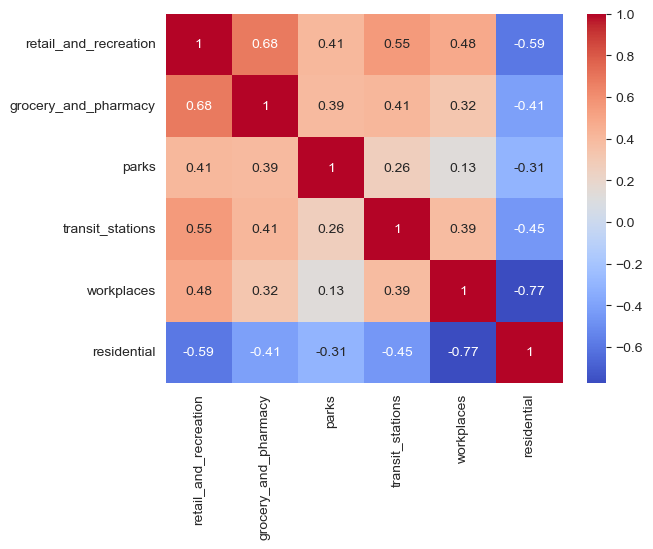

In [9]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm');

## Spatiotemporal Trends Analysis
### Temporal Trends by Date
#### Retail and Recreation

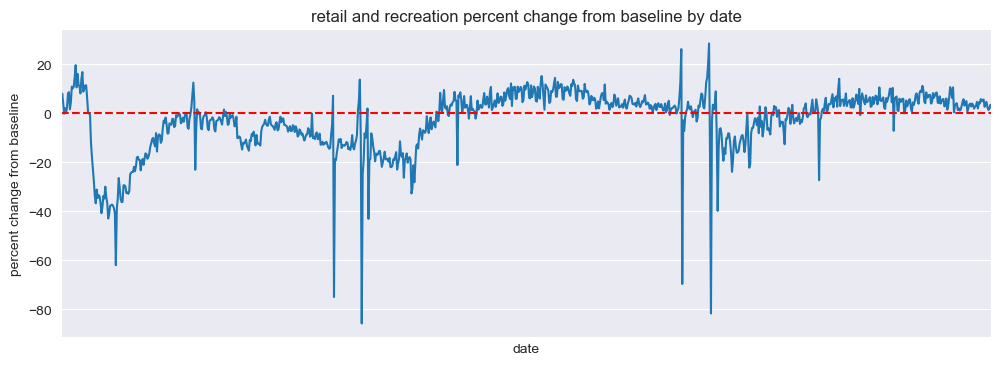

In [10]:
mobility_trends_by_date(data=US_Mobility, category='retail_and_recreation', plot_title='retail and recreation')

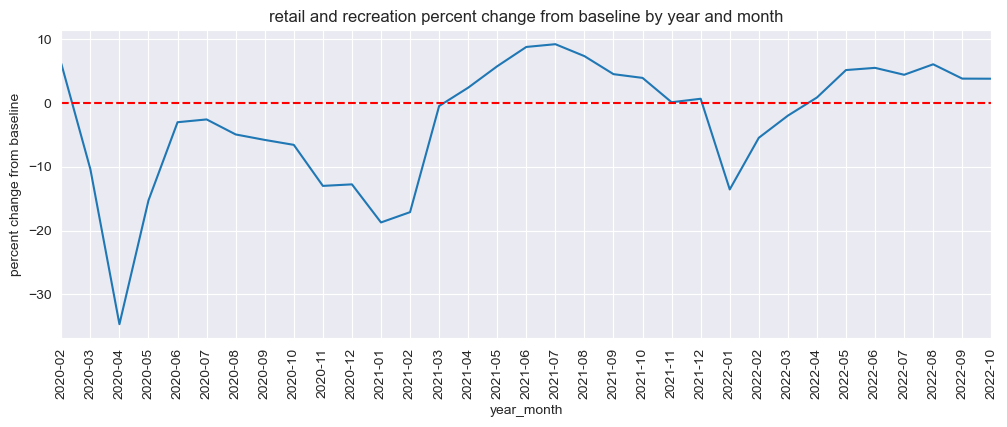

In [11]:
mobility_trends_by_year_month(data=US_Mobility, category='retail_and_recreation', plot_title='retail and recreation')

#### Parks

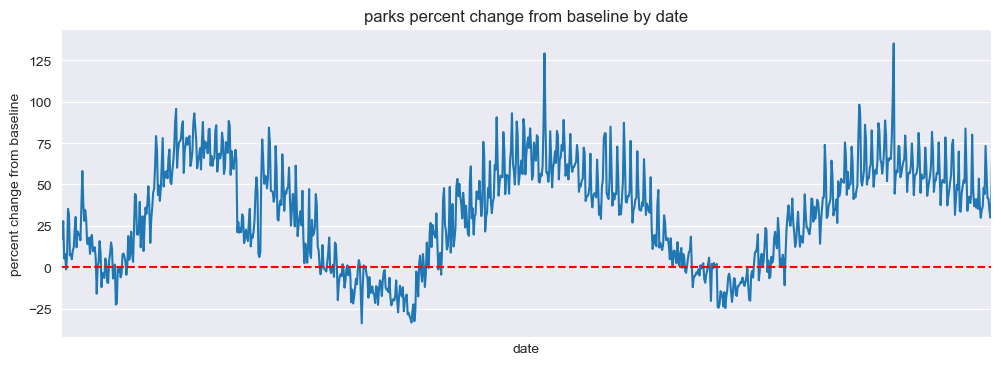

In [12]:
mobility_trends_by_date(data=US_Mobility, category='parks', plot_title='parks')

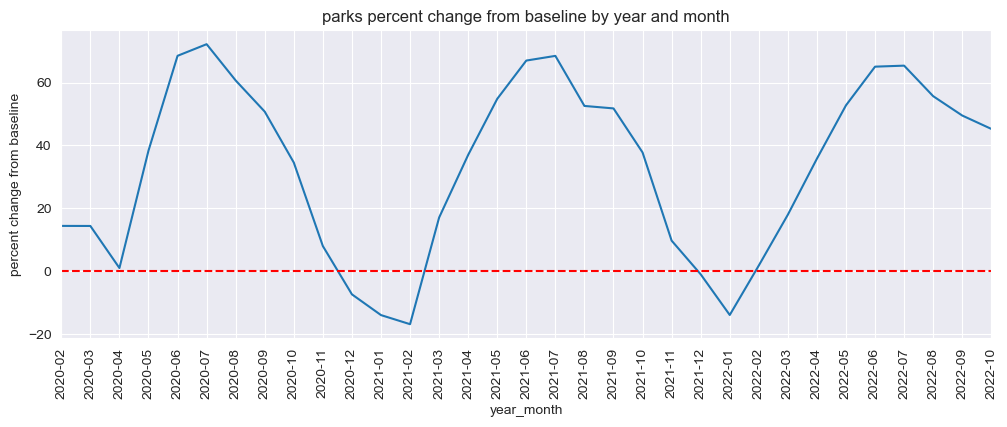

In [13]:
mobility_trends_by_year_month(data=US_Mobility, category='parks', plot_title='parks')

#### Transit Stations

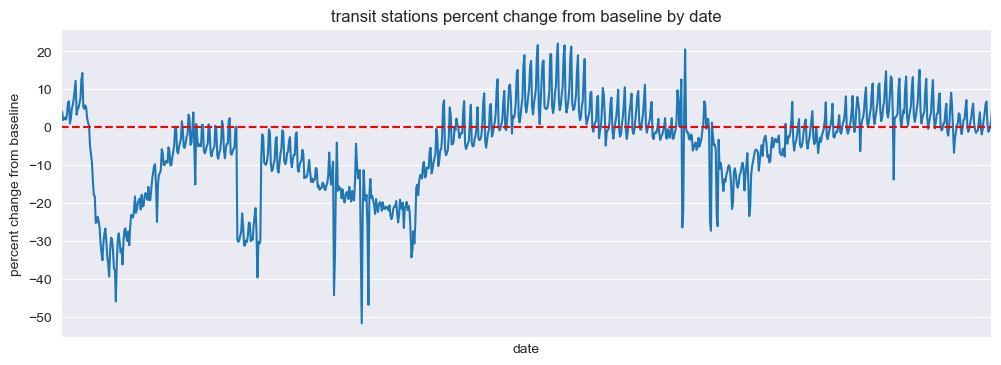

In [14]:
mobility_trends_by_date(data=US_Mobility, category='transit_stations', plot_title='transit stations')

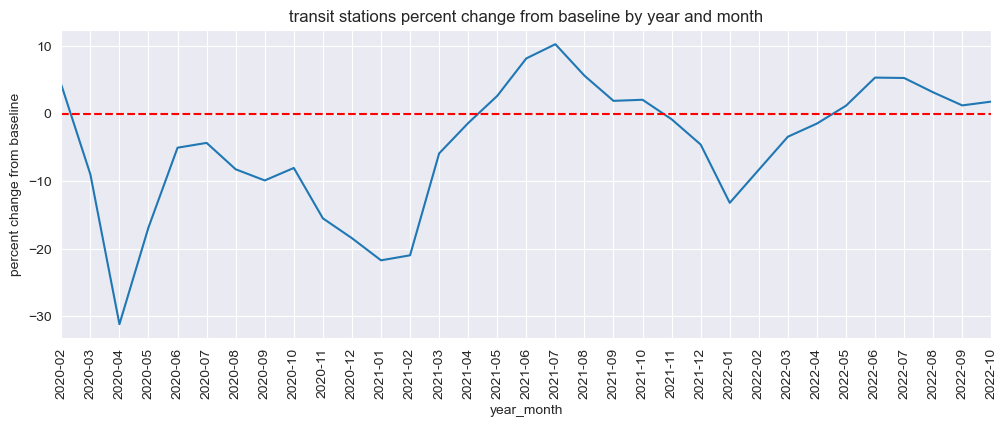

In [15]:
mobility_trends_by_year_month(data=US_Mobility, category='transit_stations', plot_title='transit stations')

#### Grocery and Pharmacy

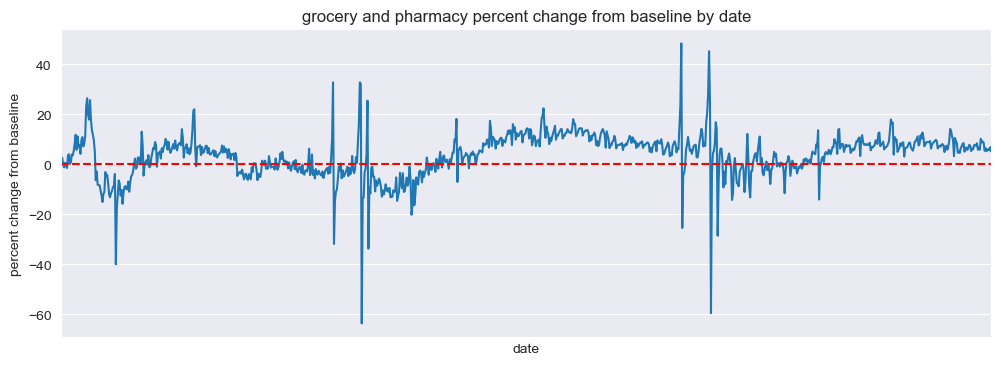

In [16]:
mobility_trends_by_date(data=US_Mobility, category='grocery_and_pharmacy', plot_title='grocery and pharmacy')

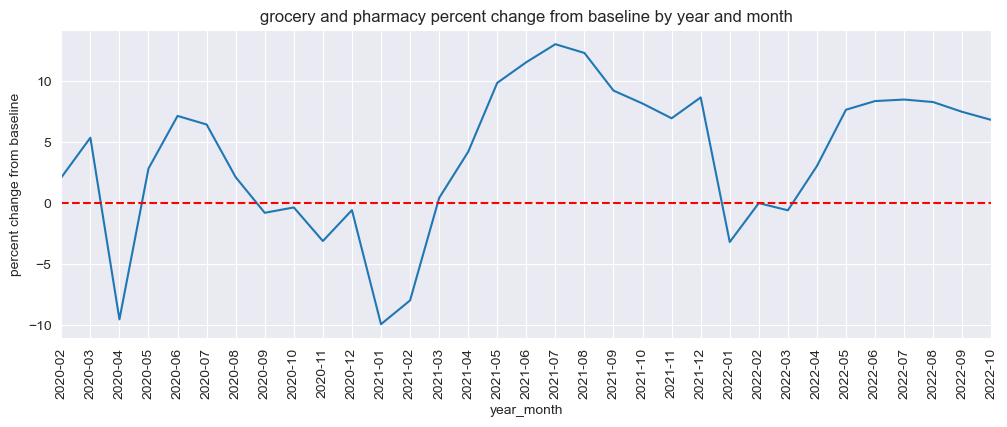

In [17]:
mobility_trends_by_year_month(data=US_Mobility, category='grocery_and_pharmacy', plot_title='grocery and pharmacy')

#### Residential

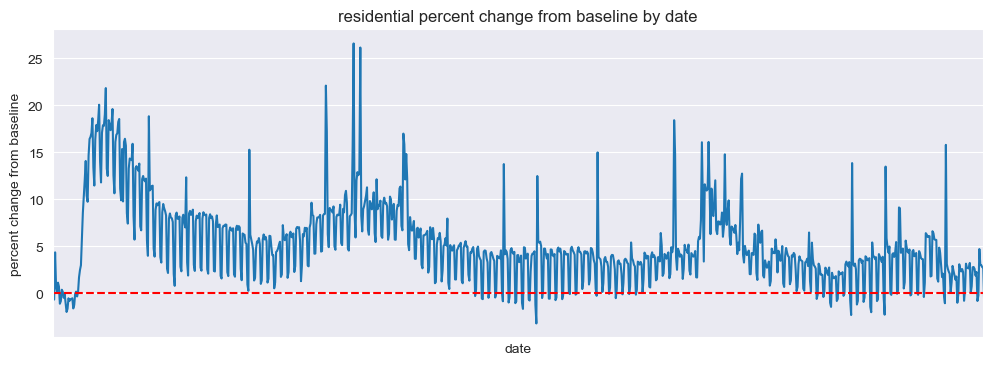

In [18]:
mobility_trends_by_date(data=US_Mobility, category='residential', plot_title='residential')

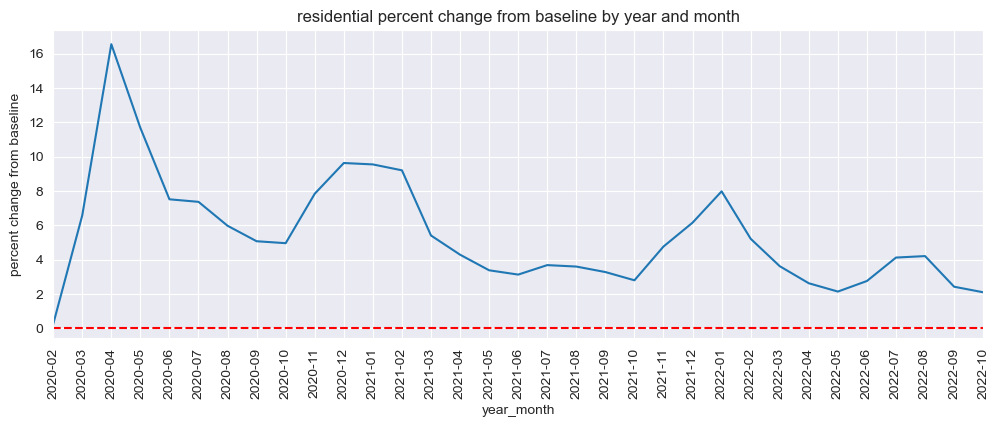

In [19]:
mobility_trends_by_year_month(data=US_Mobility, category='residential', plot_title='residential')

#### Workplaces

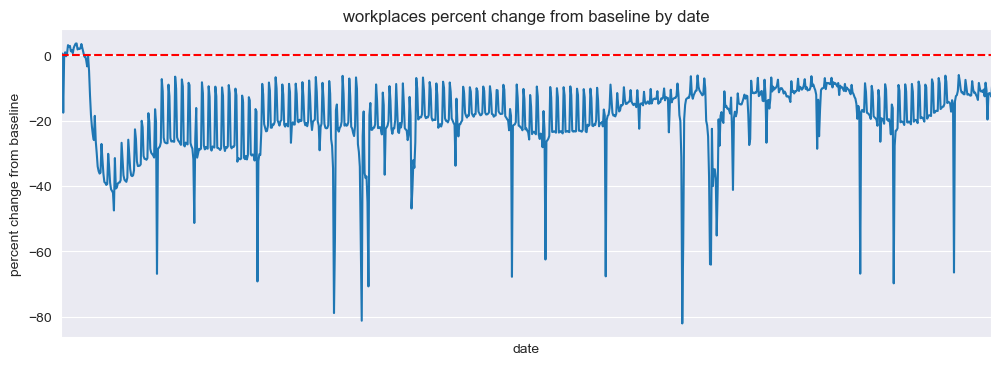

In [20]:
mobility_trends_by_date(data=US_Mobility, category='workplaces', plot_title='workplaces')

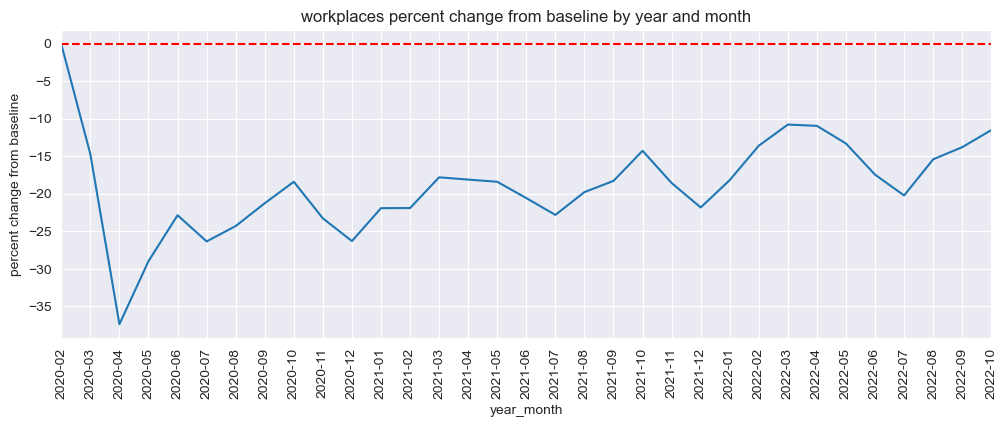

In [21]:
mobility_trends_by_year_month(data=US_Mobility, category='workplaces', plot_title='workplaces')

Our analysis revealed significant decreases in mobility across all categories during the pandemic, with the most substantial reductions observed in retail and recreation, transit stations, and workplaces. The residential category experienced increased mobility, reflecting the shift to remote work and stay-at-home orders.

### Spatial Trends by State
#### Retail and Recreation

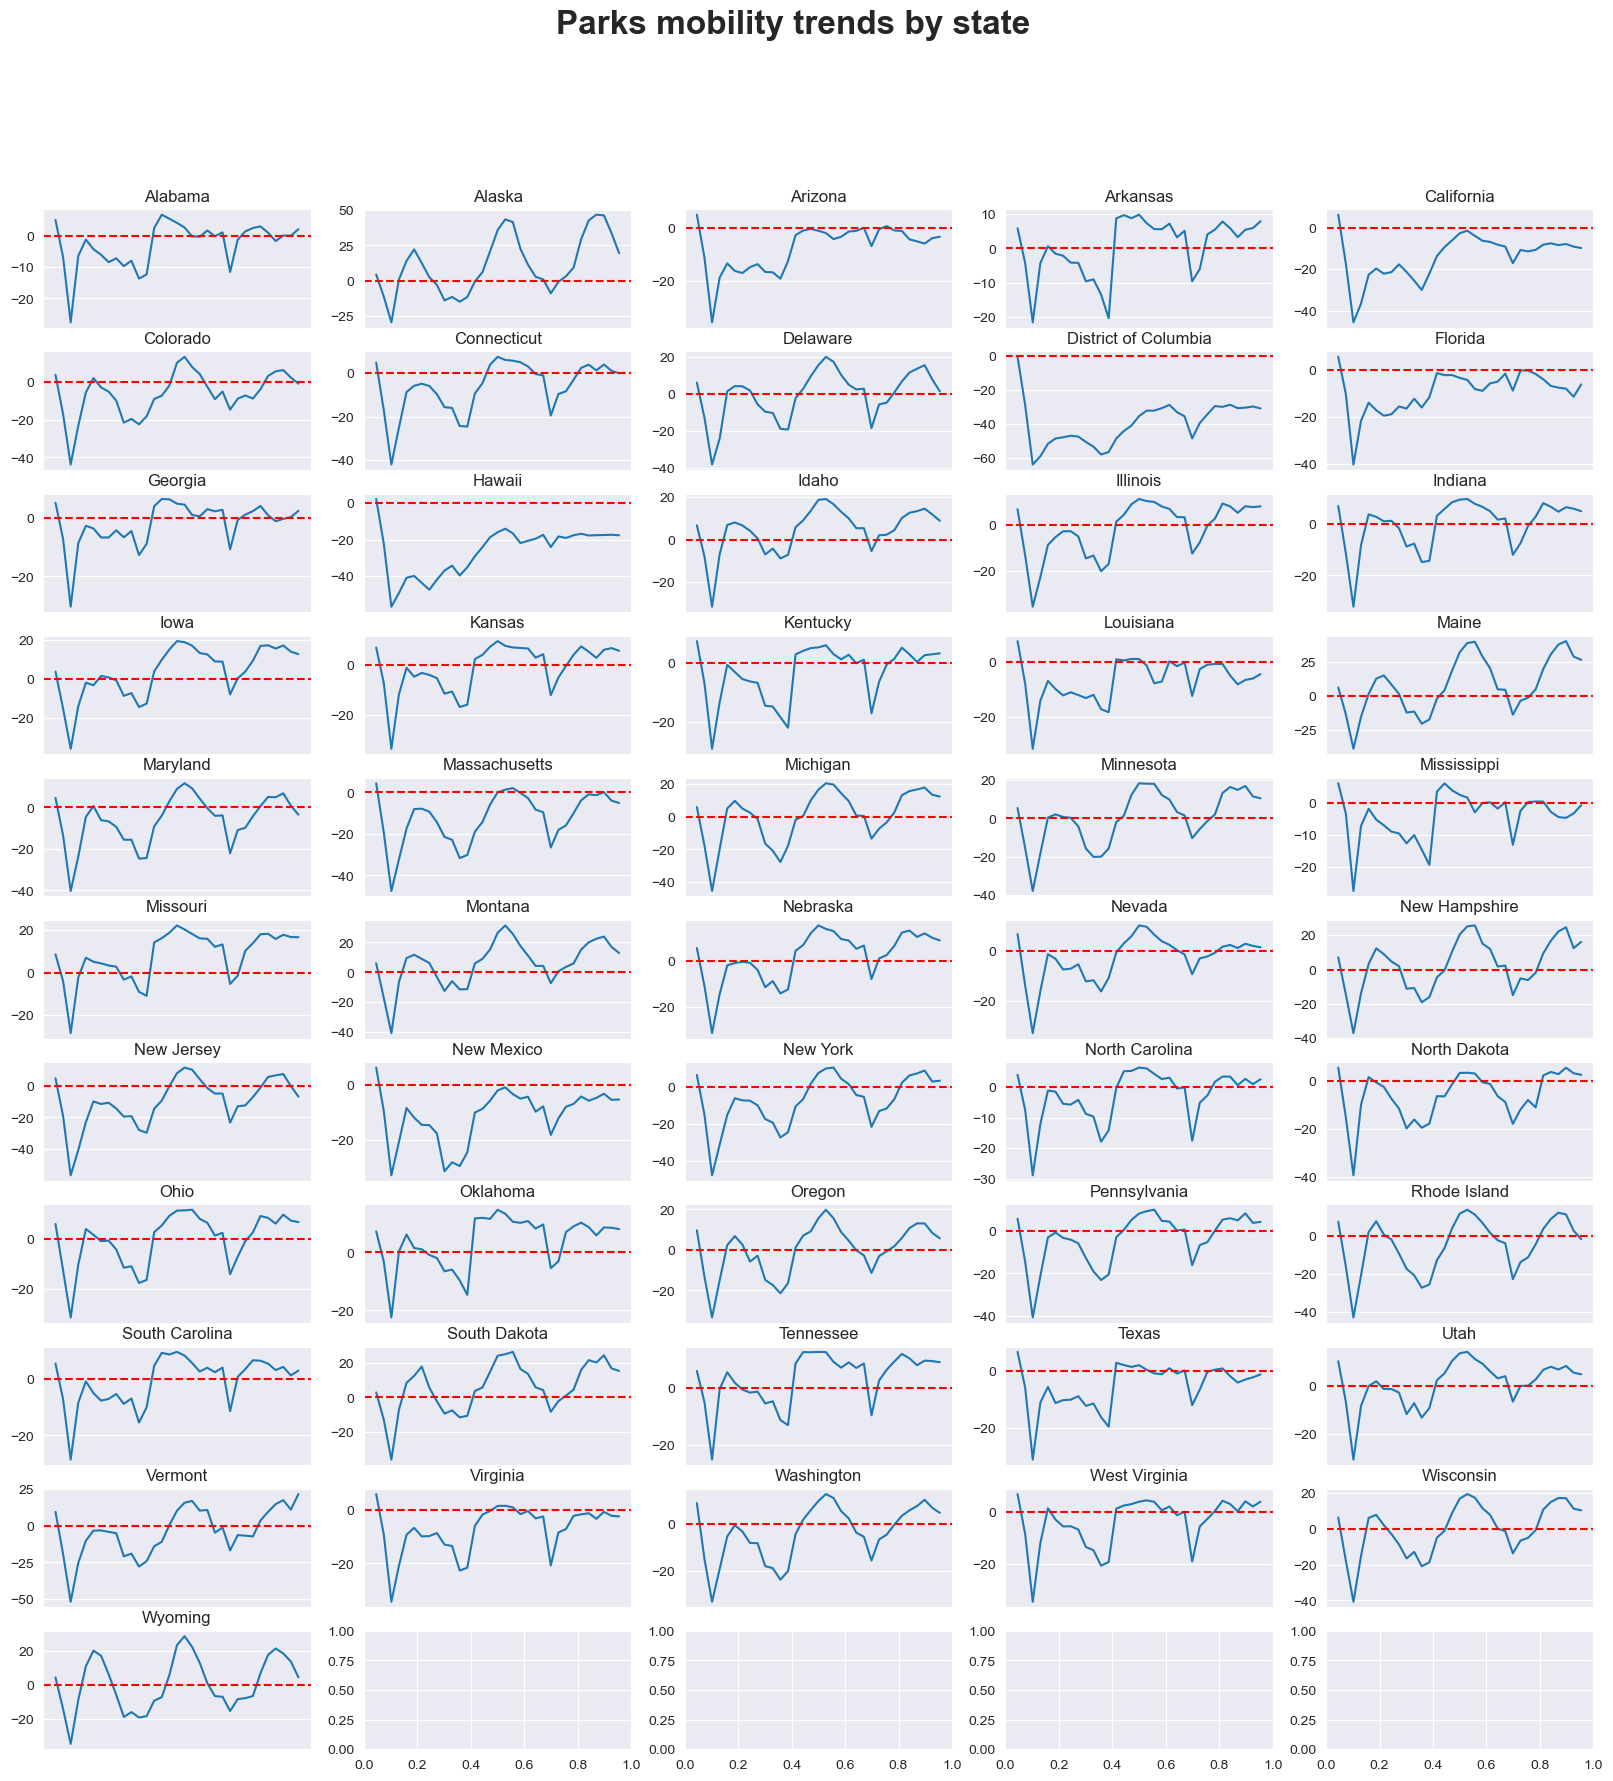

In [22]:
mobility_trends_by_category(data=US_Mobility, category='retail_and_recreation', plot_title='Parks')

#### Parks

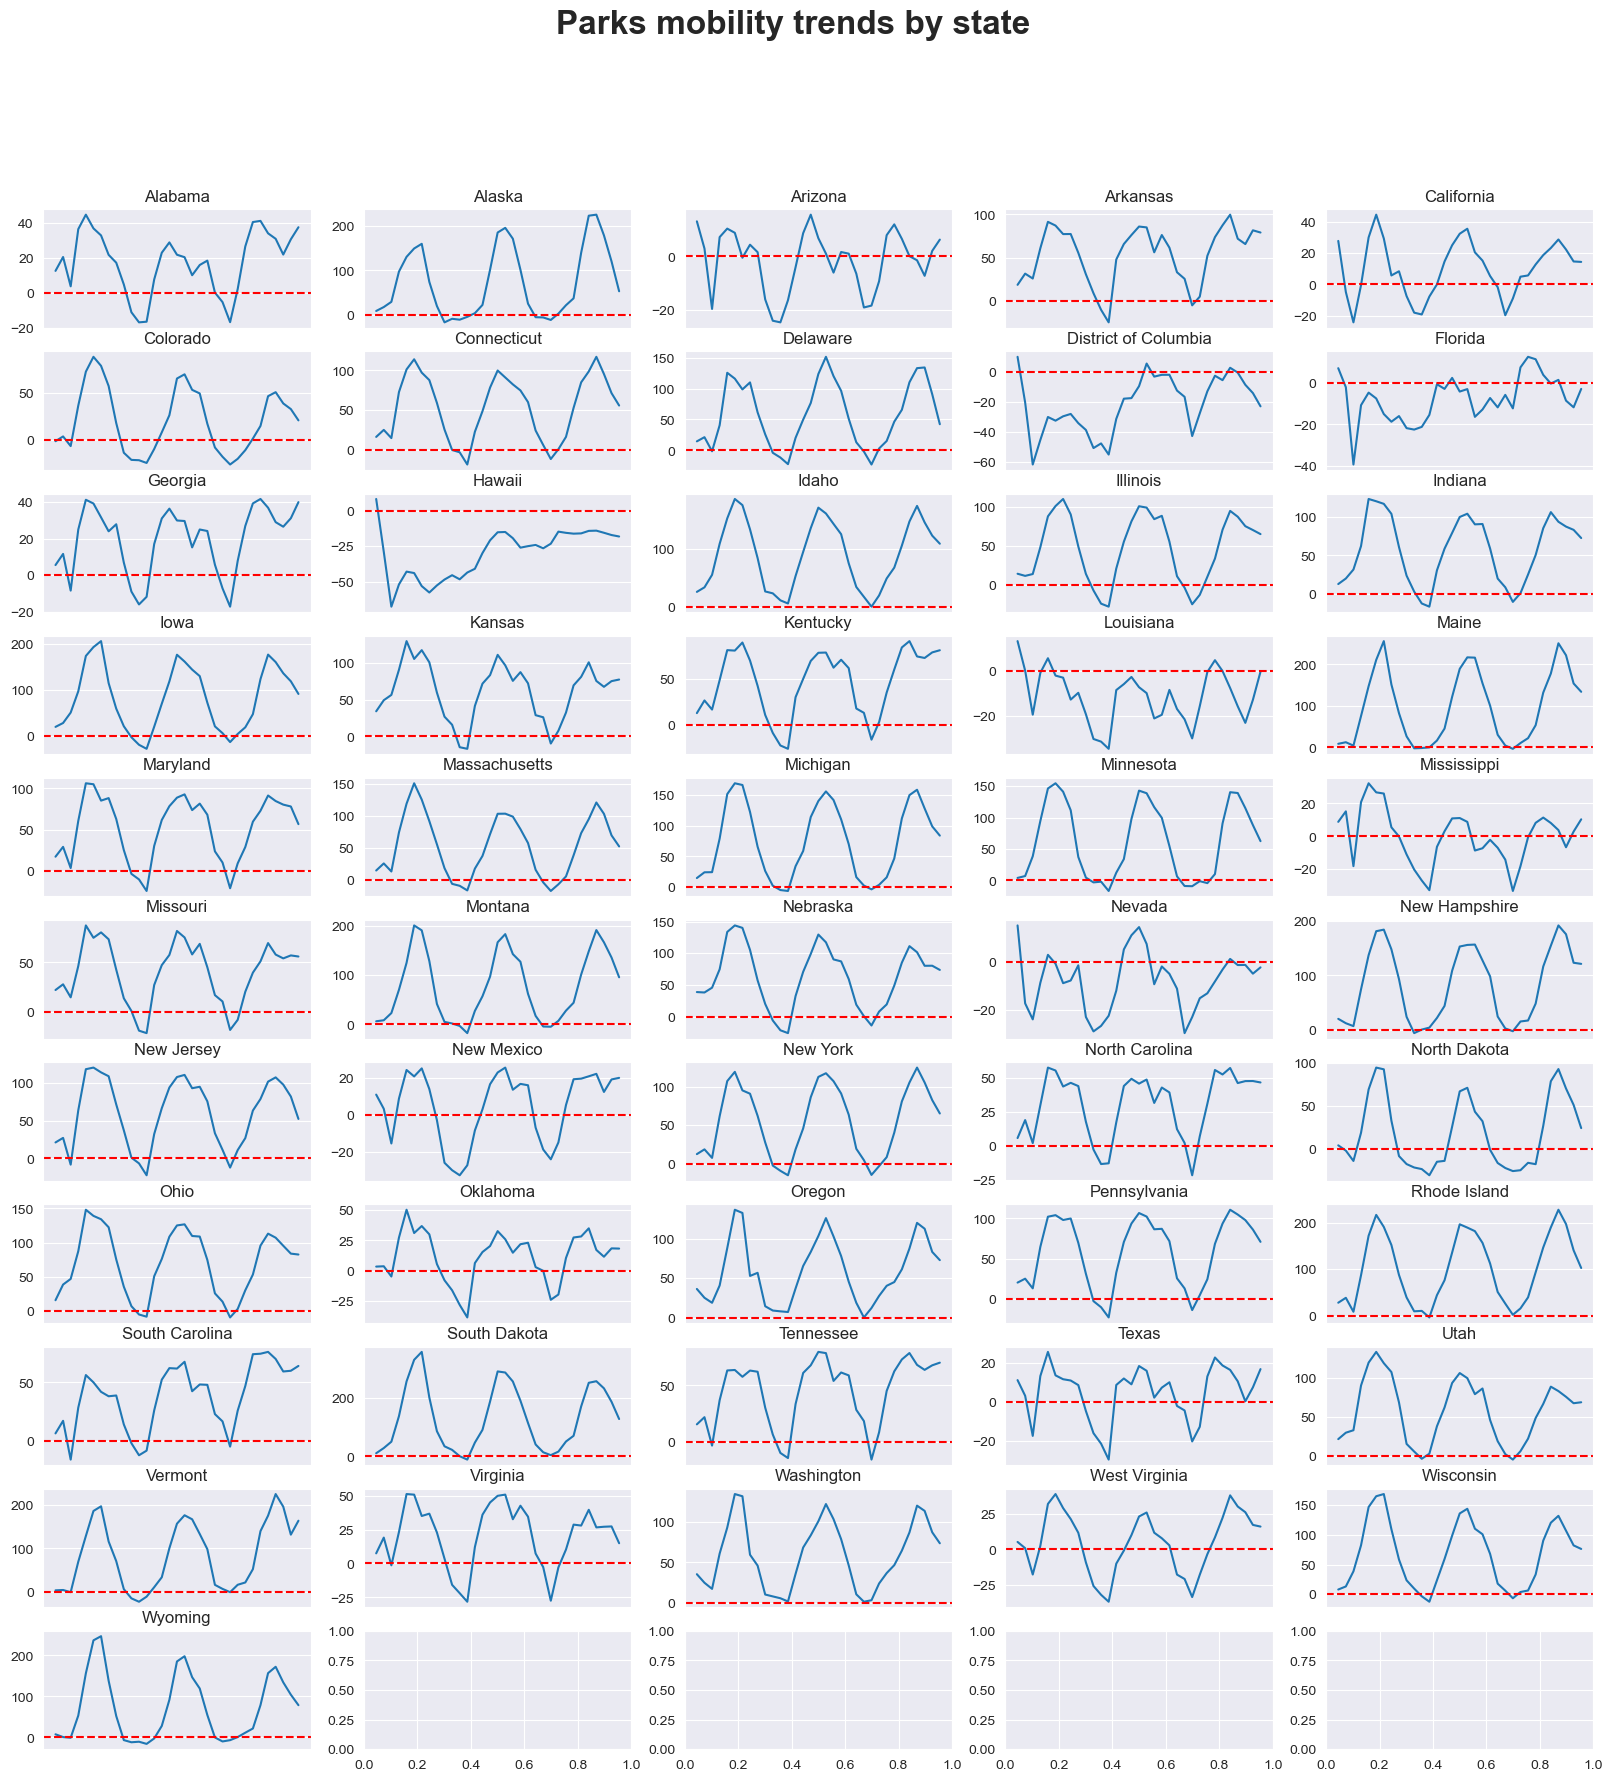

In [23]:
mobility_trends_by_category(data=US_Mobility, category='parks', plot_title='Parks')

#### Transit Stations

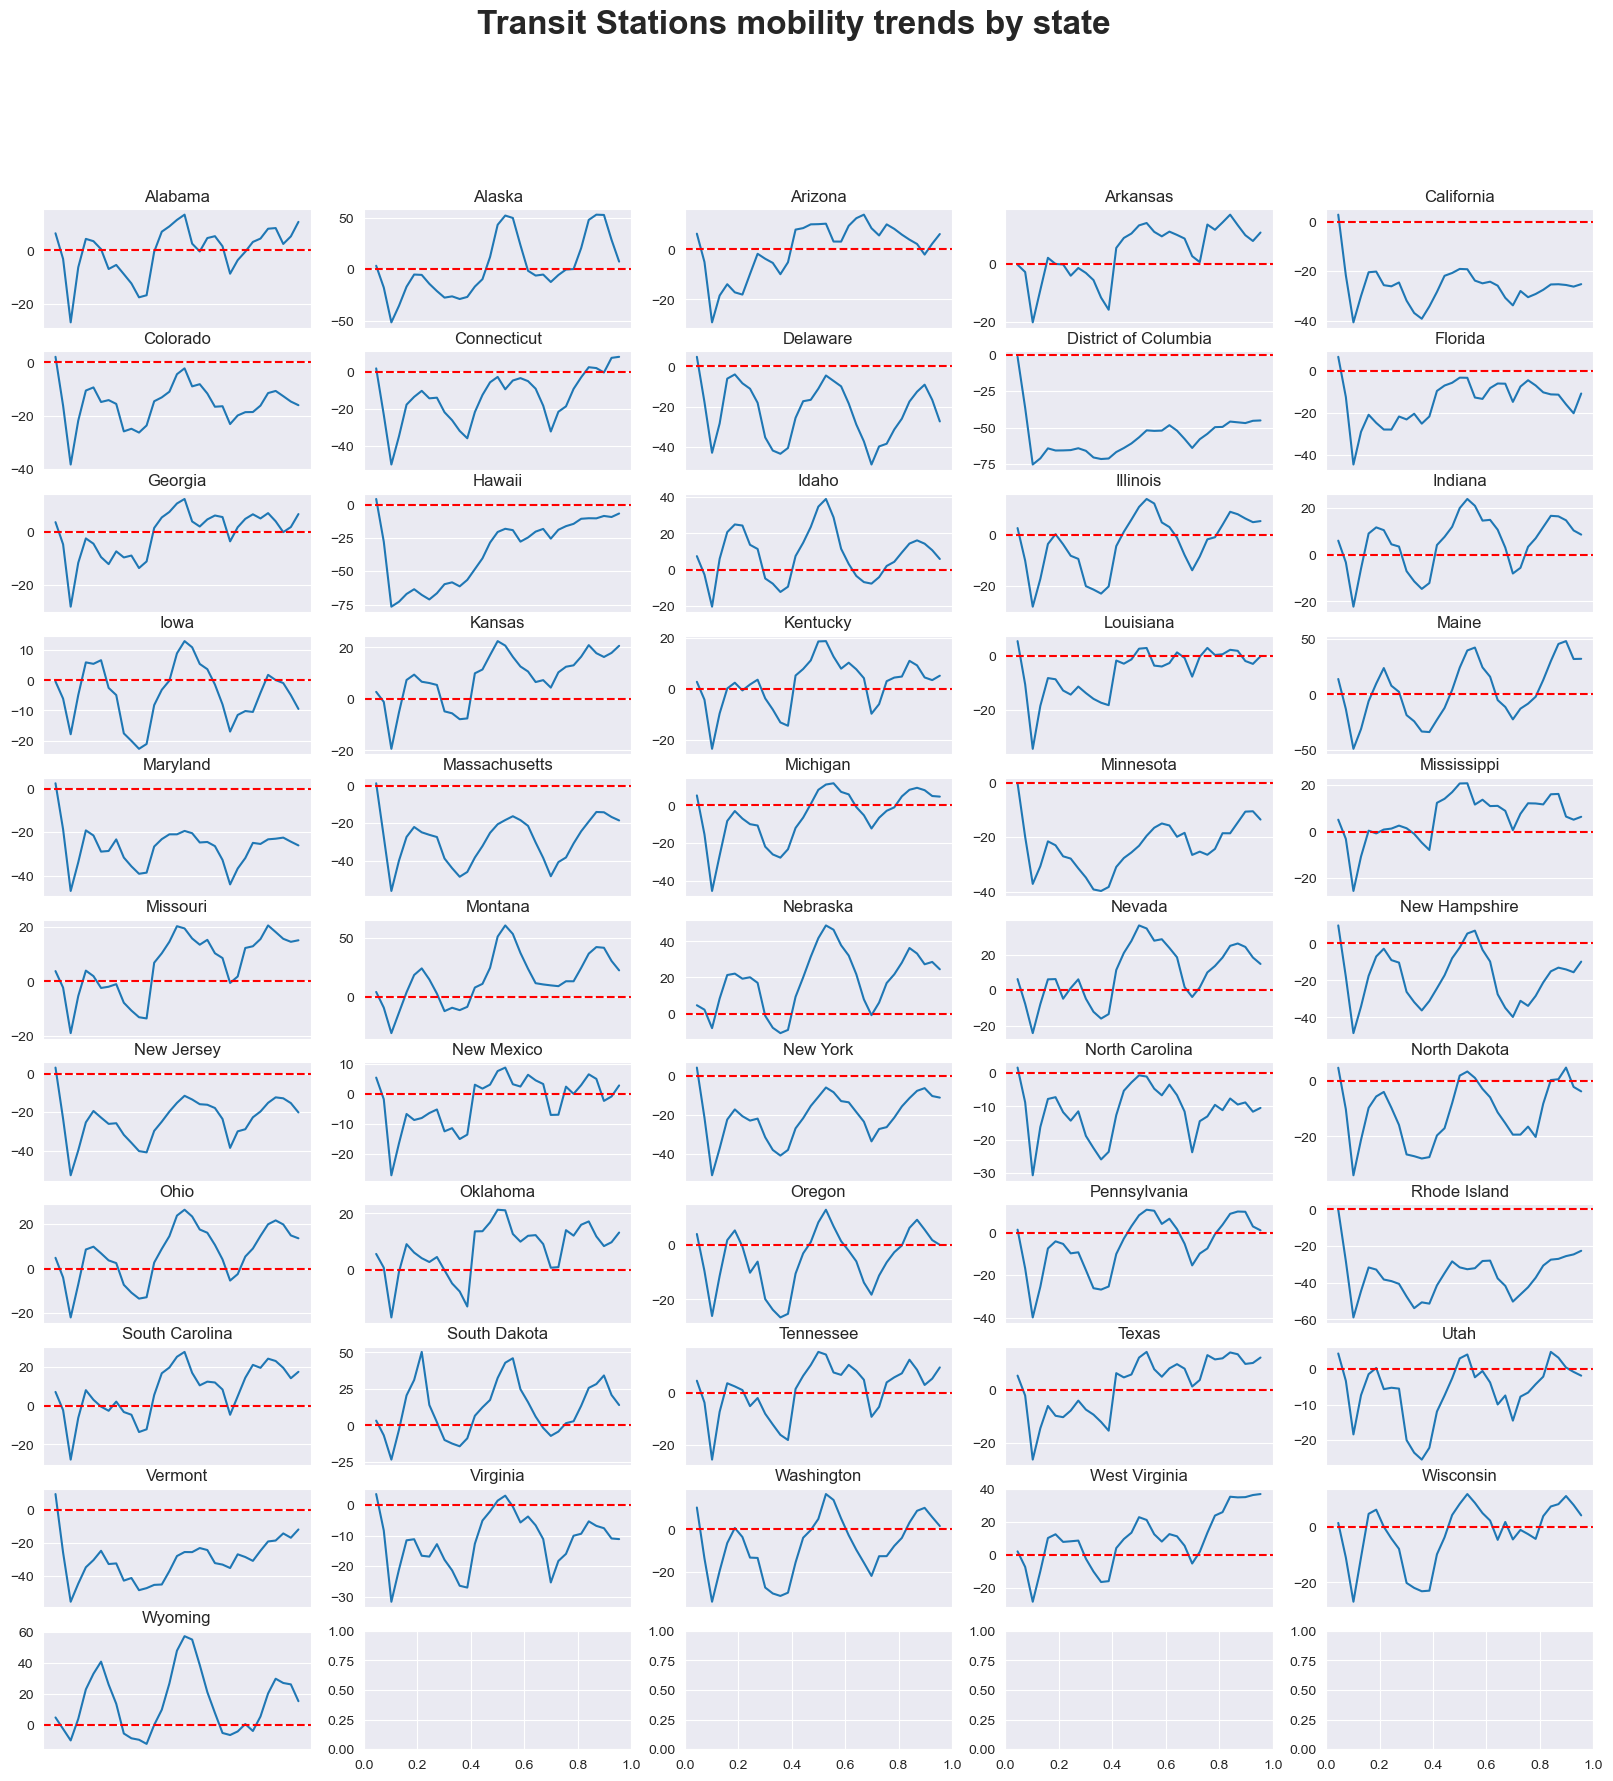

In [24]:
mobility_trends_by_category(data=US_Mobility, category='transit_stations', plot_title='Transit Stations')

#### Grocery and Pharmacy

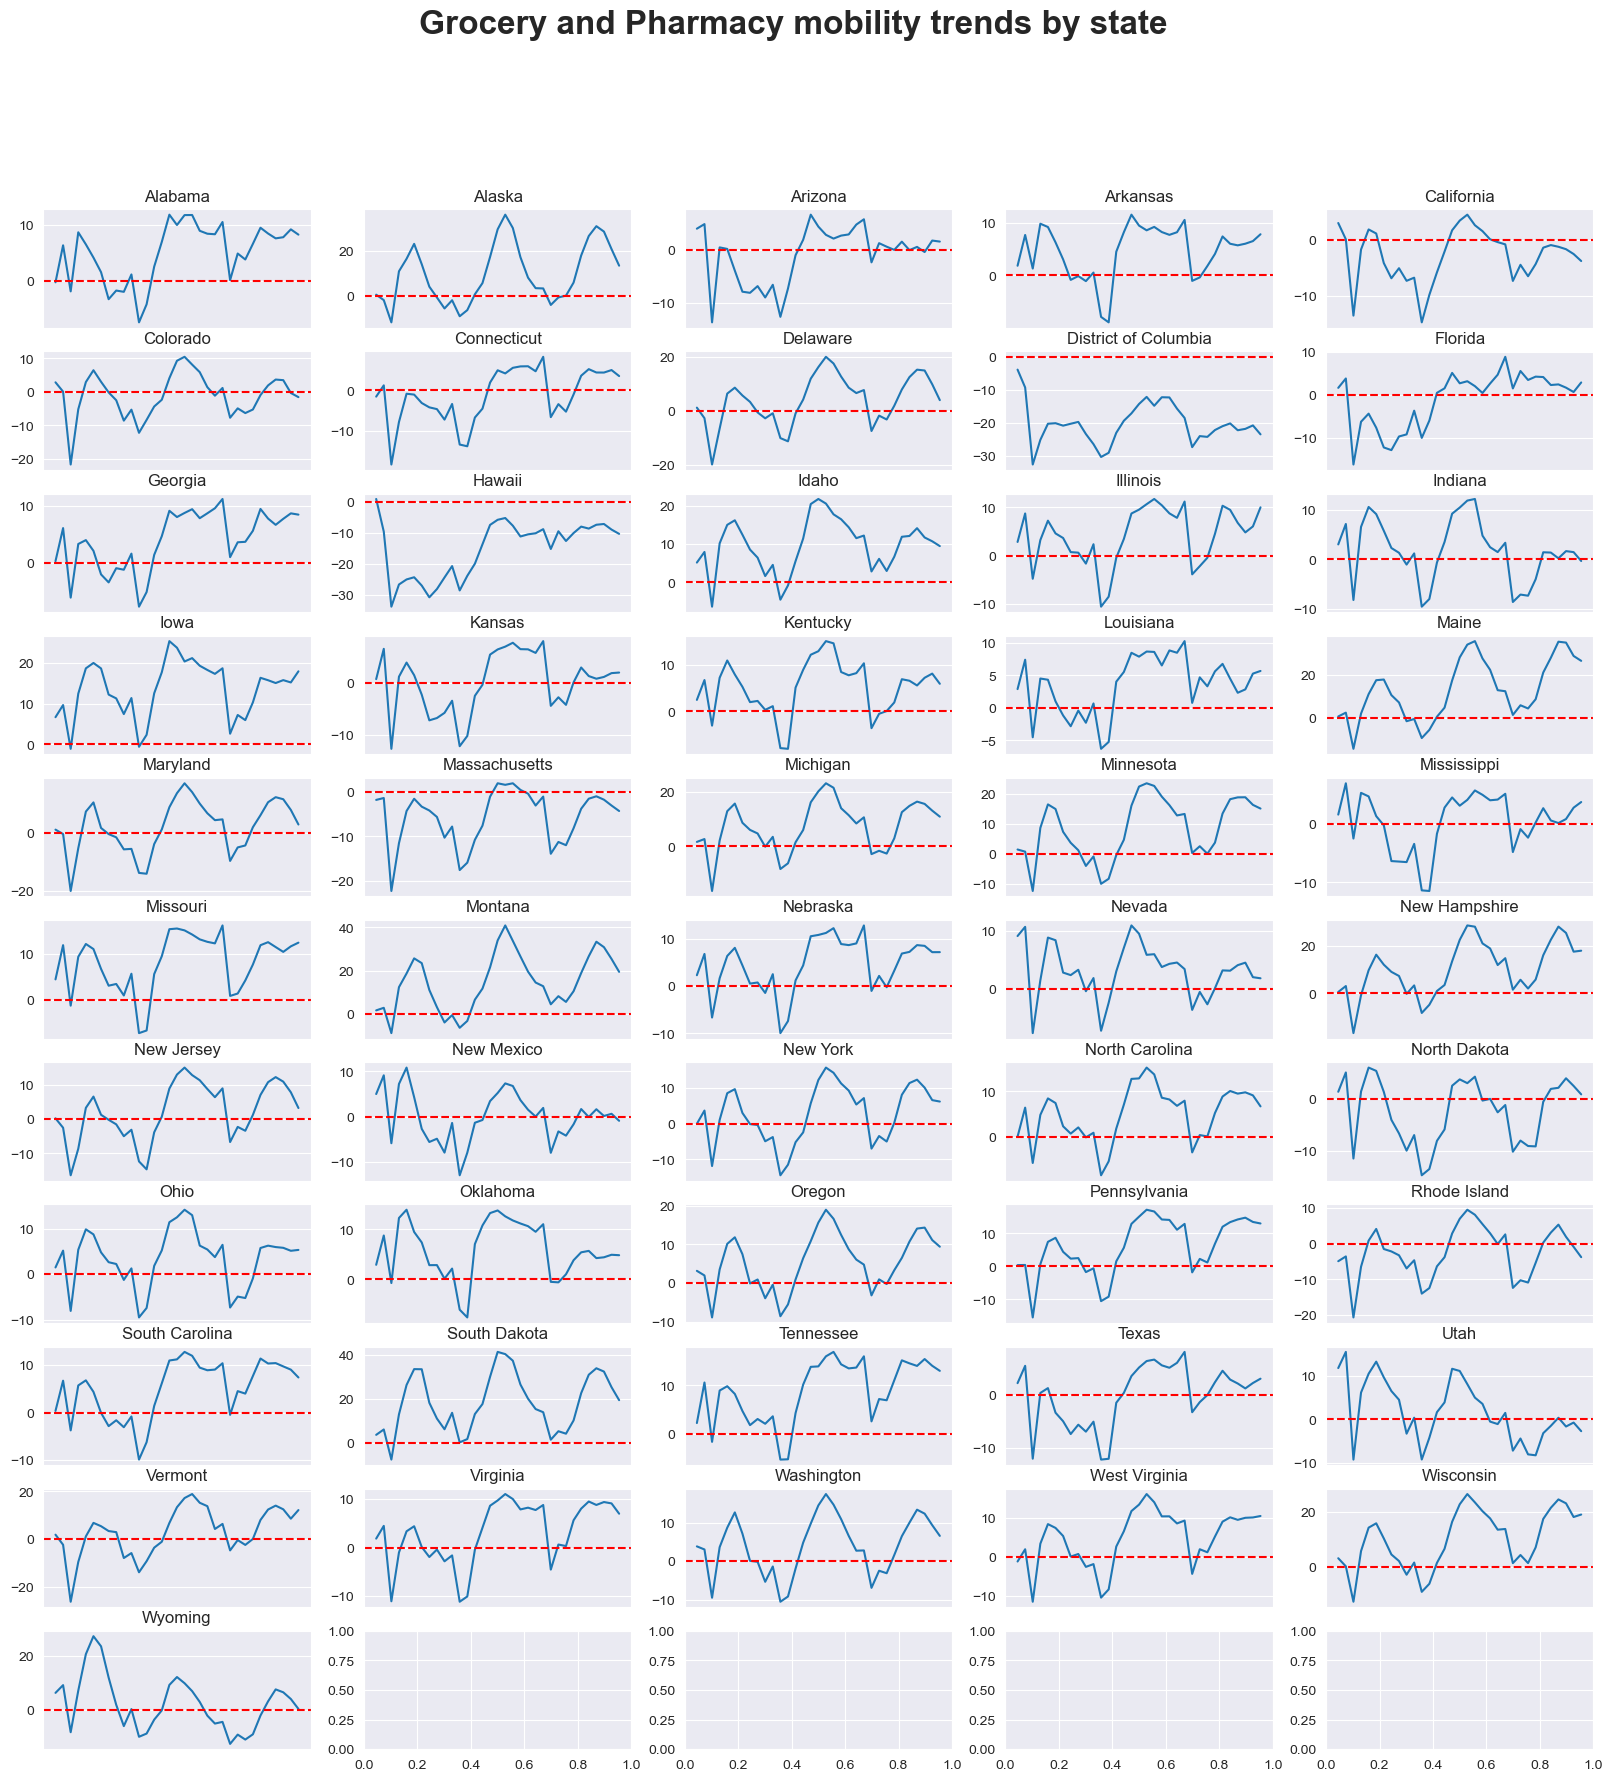

In [25]:
mobility_trends_by_category(data=US_Mobility, category='grocery_and_pharmacy', plot_title='Grocery and Pharmacy')

#### Residential

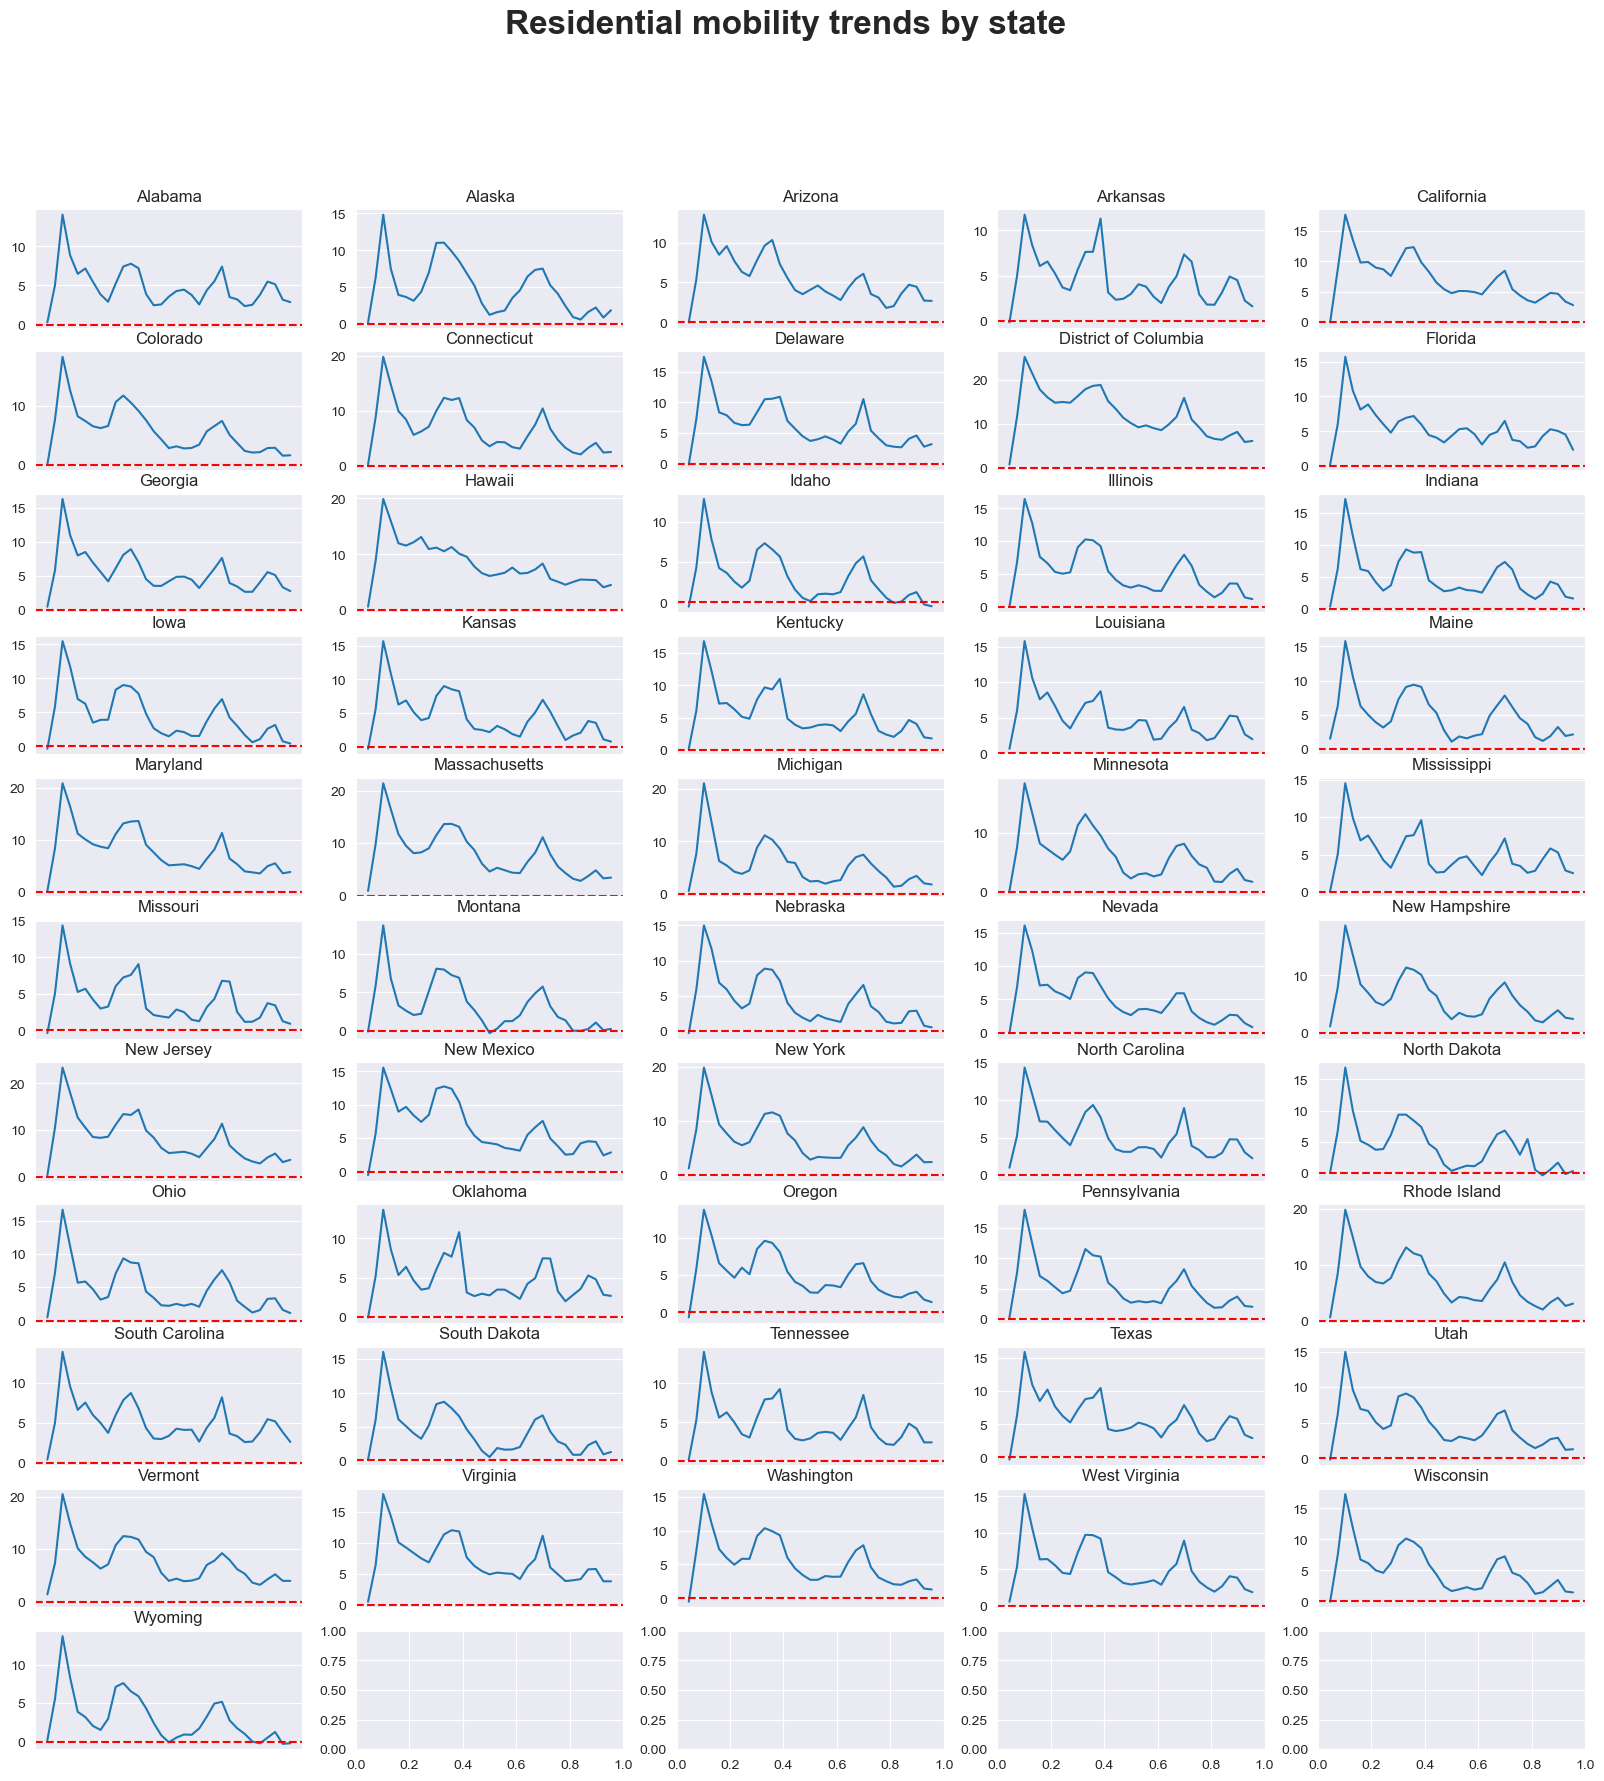

In [26]:
mobility_trends_by_category(data=US_Mobility, category='residential', plot_title='Residential')

#### Workplaces

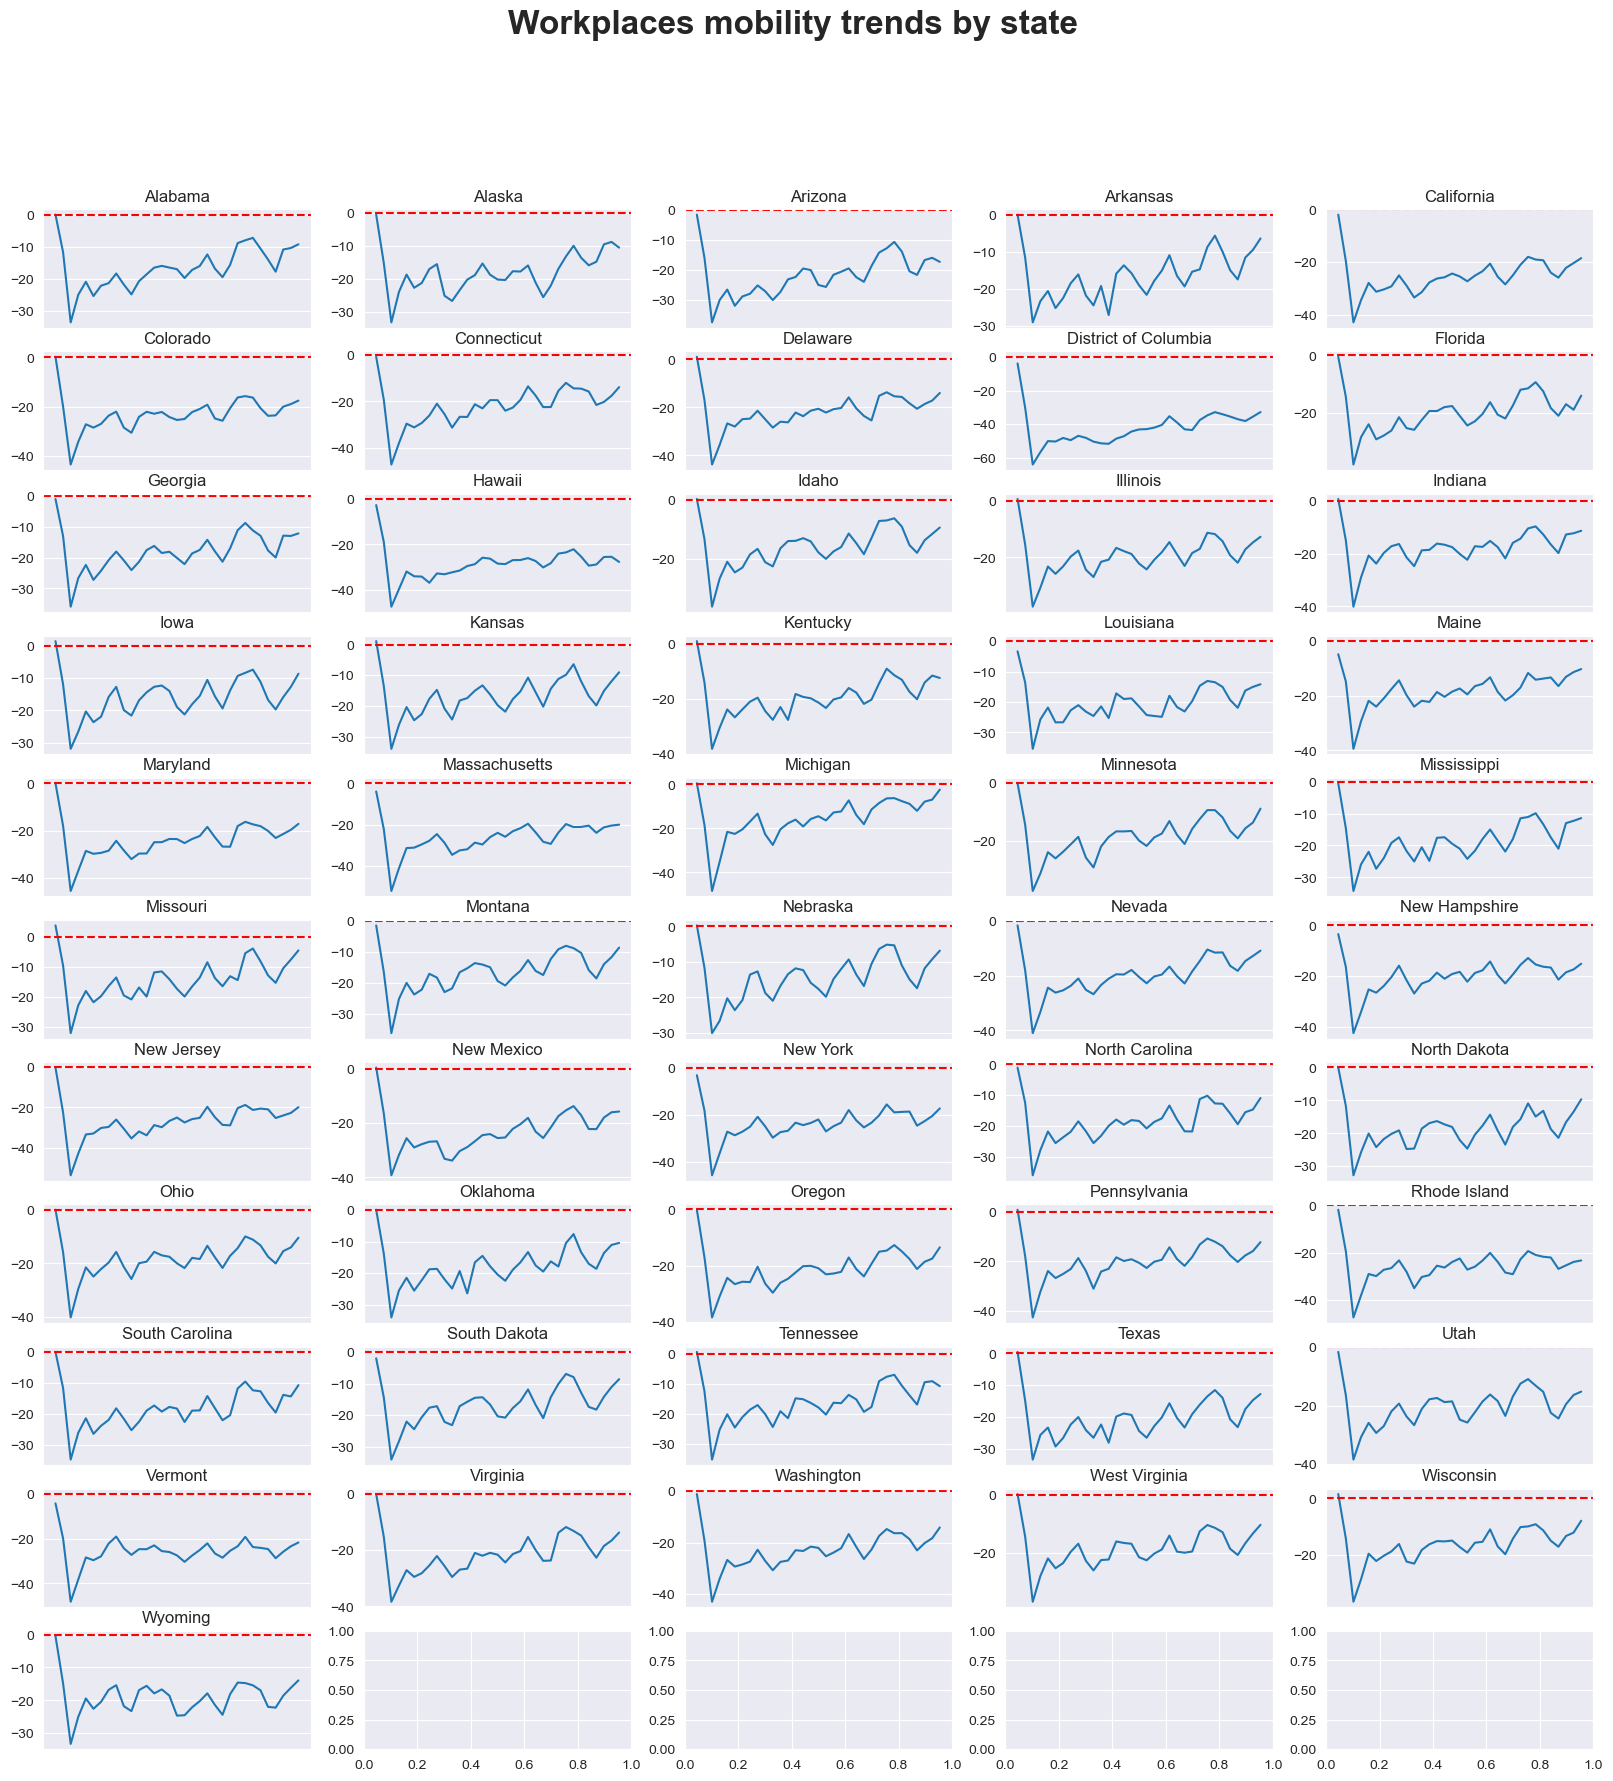

In [27]:
mobility_trends_by_category(data=US_Mobility, category='workplaces', plot_title='Workplaces')

## Dependency Analysis

### Analyze covid cases by state

In [28]:
covid = pd.read_csv("data/covid.csv")
covid = covid[covid["Location"] != "United States"]
covid["COVID_rate (%)"] = 100*(covid["Oct_2020_Cases"] / covid["Total Population"])

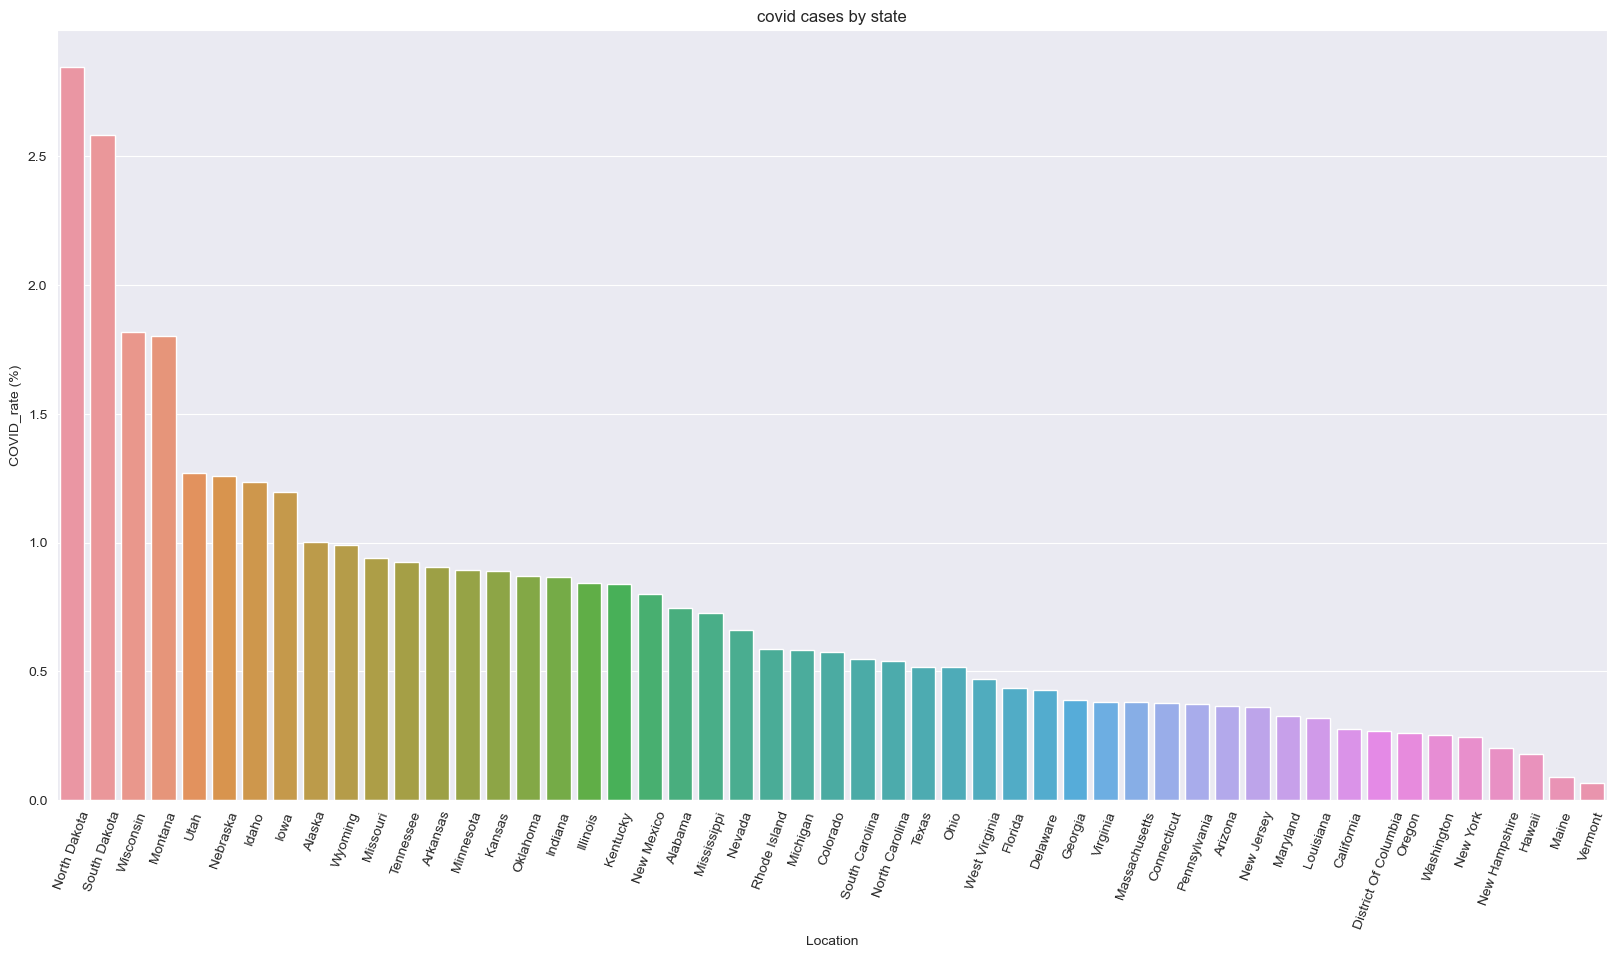

In [29]:
covid_sorted = covid.sort_values("COVID_rate (%)", ascending = False)
covid_sorted.head()

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=covid_sorted, x="Location", y="COVID_rate (%)")
plt.title("covid cases by state")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);

### How different gathering bans affect covid affection rate?

array(['No Limit', '>50 Prohibited', 'All Gatherings Prohibited',
       '>10 Prohibited', '>25 Prohibited'], dtype=object)

COVID_rate (%)
Large Gatherings Ban                     
>50 Prohibited                   0.923554
>25 Prohibited                   0.919531
No Limit                         0.906760
>10 Prohibited                   0.534330
All Gatherings Prohibited        0.416476

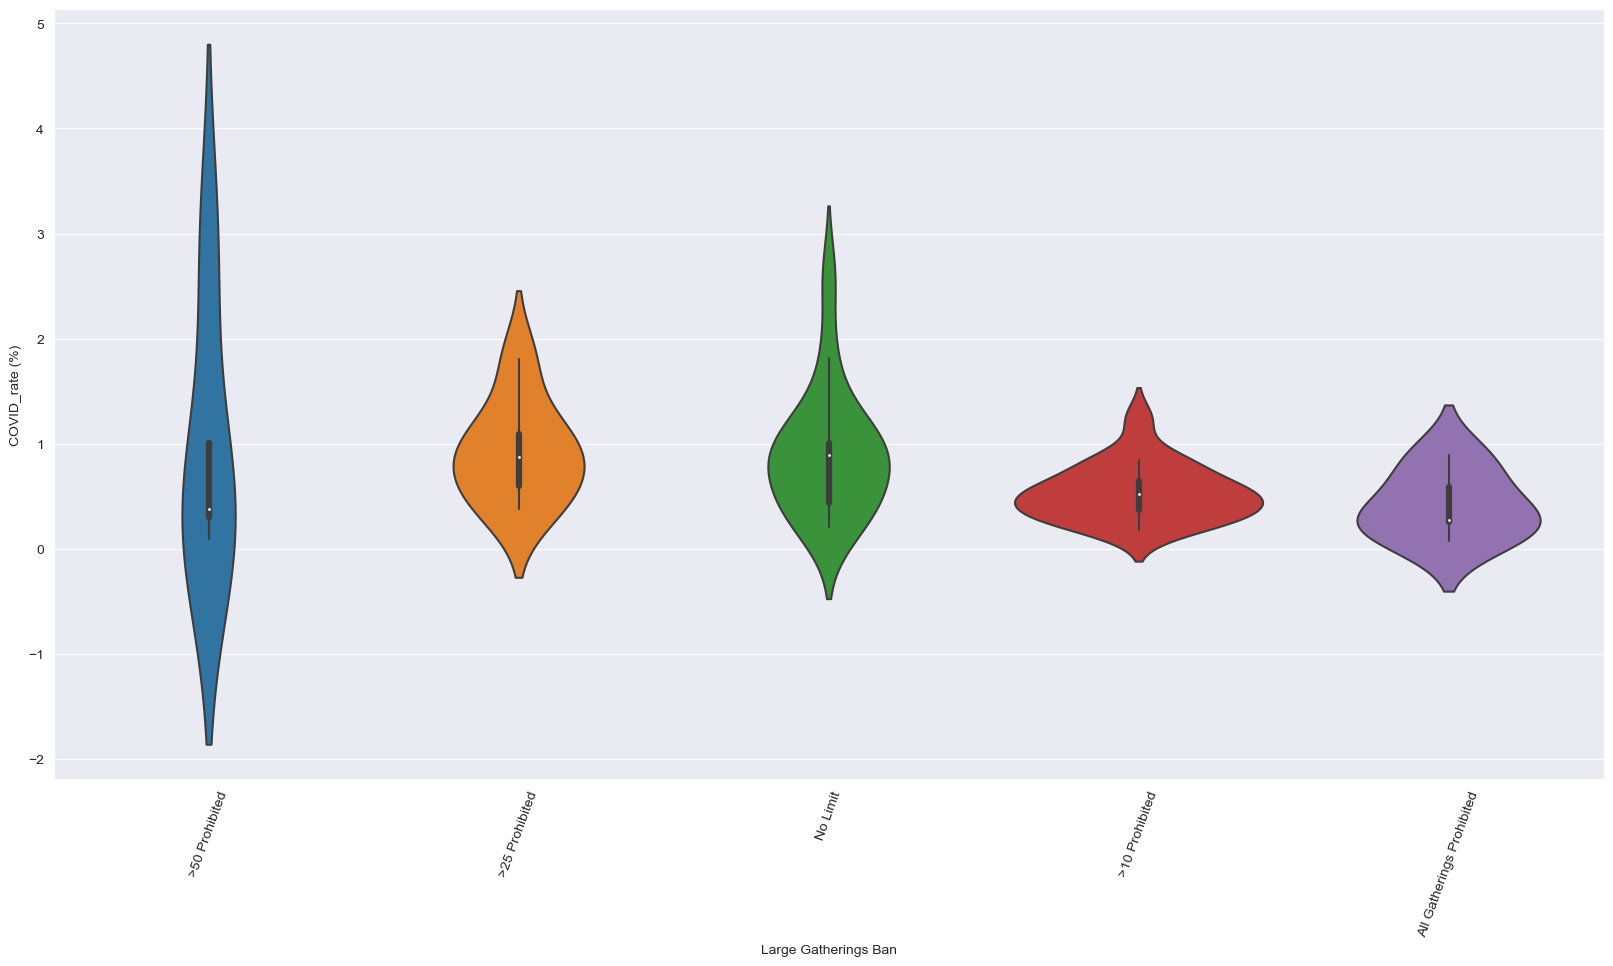

In [30]:
display(covid["Large Gatherings Ban"].unique())
covid_gathering_bans = (pd.DataFrame(covid.groupby("Large Gatherings Ban")["COVID_rate (%)"].mean())
                        .sort_values("COVID_rate (%)", ascending = False))
covid_gathering_bans


fig, ax = plt.subplots(figsize=(20, 10))
#sns.barplot(data=covid_sorted, x="Location", y="COVID_rate (%)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
sns.violinplot(data=covid, x="Large Gatherings Ban", y="COVID_rate (%)", order=covid_gathering_bans.index)
#sns.lineplot(
#    x=covid_gathering_bans.index,
#    y=covid_gathering_bans["COVID_rate (%)"],
#    style="event"
#)
covid_gathering_bans

we could see that gathering bans are useful in preventing the spread of COVID

### regression covid infection rate on other variables

In [31]:
features = ["COVID_rate (%)", "Depression.2020", "Employer", "Medicaid", "Medicare", "Uninsured", "Large Gatherings Ban", "Restaurant Limits"]
covid1 = covid[features]

In [32]:
numerical = list((covid1.dtypes[covid1.dtypes == 'float64'].index) | (covid1.dtypes[covid1.dtypes == 'int64'].index))
categorical = list((covid1.dtypes[covid1.dtypes != 'float64'].index) & (covid1.dtypes[covid1.dtypes != 'int64'].index))
categorical

['Large Gatherings Ban', 'Restaurant Limits']

In [33]:
def ohe(data, column):
    enc = OneHotEncoder()
    enc.fit(data[column])
    encoded_data = pd.DataFrame(enc.transform(data[column]).toarray().astype(int))
    encoded_data.columns = enc.get_feature_names_out()
    encoded_data = encoded_data.set_index(data.index)
    return encoded_data

In [34]:
ohe_df = pd.concat([covid1[numerical], ohe(covid1[categorical], categorical)], axis=1)
ohe_df.head()

COVID_rate (%)  Depression.2020  Employer  Medicaid  Medicare  Uninsured  \
0        0.745250             33.8  0.469639  0.195321  0.158831   0.101714   
1        1.001716             27.1  0.481289  0.213177  0.094280   0.120369   
2        0.367290             27.2  0.444624  0.223905  0.155921   0.106147   
3        0.906918             28.3  0.418750  0.272687  0.156044   0.082839   
4        0.276735             29.7  0.473513  0.263108  0.109437   0.071597   

   Large Gatherings Ban_>10 Prohibited  Large Gatherings Ban_>25 Prohibited  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   Large Gatherings Ban_>50 Prohibited  \
0                                    0   
1                                    0   
2                                    1   
3                                    0   
4                                    0   

   Large Gatherings Ban_All Gatherings Prohibited  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

   Large Gatherings Ban_No Limit  Restaurant Limits_-  \
0                              1                    0   
1                              1                    0   
2                              0                    0   
3                              1                    0   
4                              0                    0   

   Restaurant Limits_New Service Limits  \
0                                     0   
1                                     0   
2                                     1   
3                                     0   
4                                     0   

   Restaurant Limits_Newly Closed to Indoor Dining  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Restaurant Limits_Reopened to Dine-in Service  \
0                                              1   
1                                              1   
2                                              0   
3                                              0   
4                                              0   

   Restaurant Limits_Reopened to Dine-in Service with Capacity Limits  
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  1                   
4                                                  1

In [35]:
X = ohe_df.drop("COVID_rate (%)", axis=1)
y = ohe_df["COVID_rate (%)"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [37]:
model = LinearRegression().fit(X_train, y_train)

In [38]:
print('model intercept :', model.intercept_)
print('model coefficients : ', model.coef_)
print('Training Accuracy: ', model.score(X_train, y_train))

model intercept : 3.8192792490168204
model coefficients :  [-0.01522958 -2.86343683 -3.30809215 -3.93673412  2.1371601  -0.03378686
  0.4202171  -0.38477096 -0.10947185  0.10781256  1.2697461  -0.22060498
 -0.1507367  -0.42249257 -0.47591184]
Training Accuracy:  0.722562928021383


In [39]:
test_predictions = model.predict(X_test)
mean_squared_error(y_test, test_predictions)

0.4365241953146723

## Social Productivity-Related Mobility Trends

Increased mobility as people spent more time at home due to remote work and stay-at-home orders.

We assumed that there will be relation between residential and workplaces categories since if people work at home, the residential mobility will increase and the workplaces mobility will decrease. Calculating the correlation coefficient between residential category and workplaces category, the value was -0.83 which is quite high. This means that as the residential mobility increases, the workplaces mobility decreases or as the residential mobility decreases, the workplaces mobility increases with quite high rate. This makes sense with our assumption of the relation between residential and workplaces mobility trend.

In this section we inspect the correlation between the social productivity-related mobility drop with the viruses transmission situation estimated by the number of cases, using the workplace and residential mobility data as instance.

In [40]:
print(US_2020['date'].min())
print(US_2022['date'].max())

2020-02-15
2022-10-15


In [41]:
cases = pd.read_csv("data/US-States.csv")
cases = cases[(cases['date'] >= '2020-02-15') & (cases['date'] <= '2022-10-15')]
cases['year_month'] = cases['date'].str.rsplit('-', n=1, expand=True).drop(columns=1, axis=1)
cases['year_month']

115      2020-02
116      2020-02
117      2020-02
118      2020-02
119      2020-02
          ...   
53033    2022-10
53034    2022-10
53035    2022-10
53036    2022-10
53037    2022-10
Name: year_month, Length: 52923, dtype: object

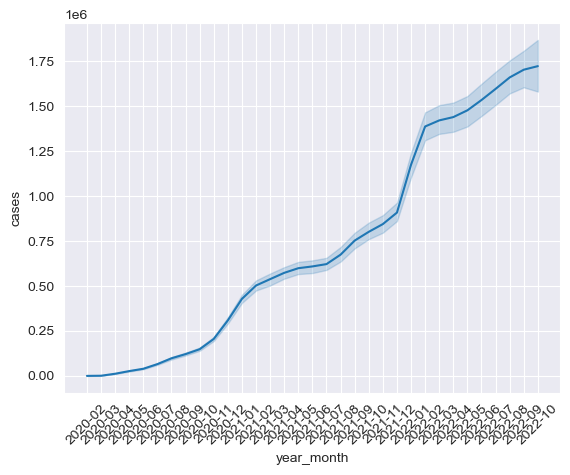

In [42]:
sns.lineplot(data = cases, x = 'year_month', y = 'cases')
plt.xticks(rotation = 45);

In [43]:
valid_case = cases[cases['state'].isin(US_Mobility['state'].unique())]

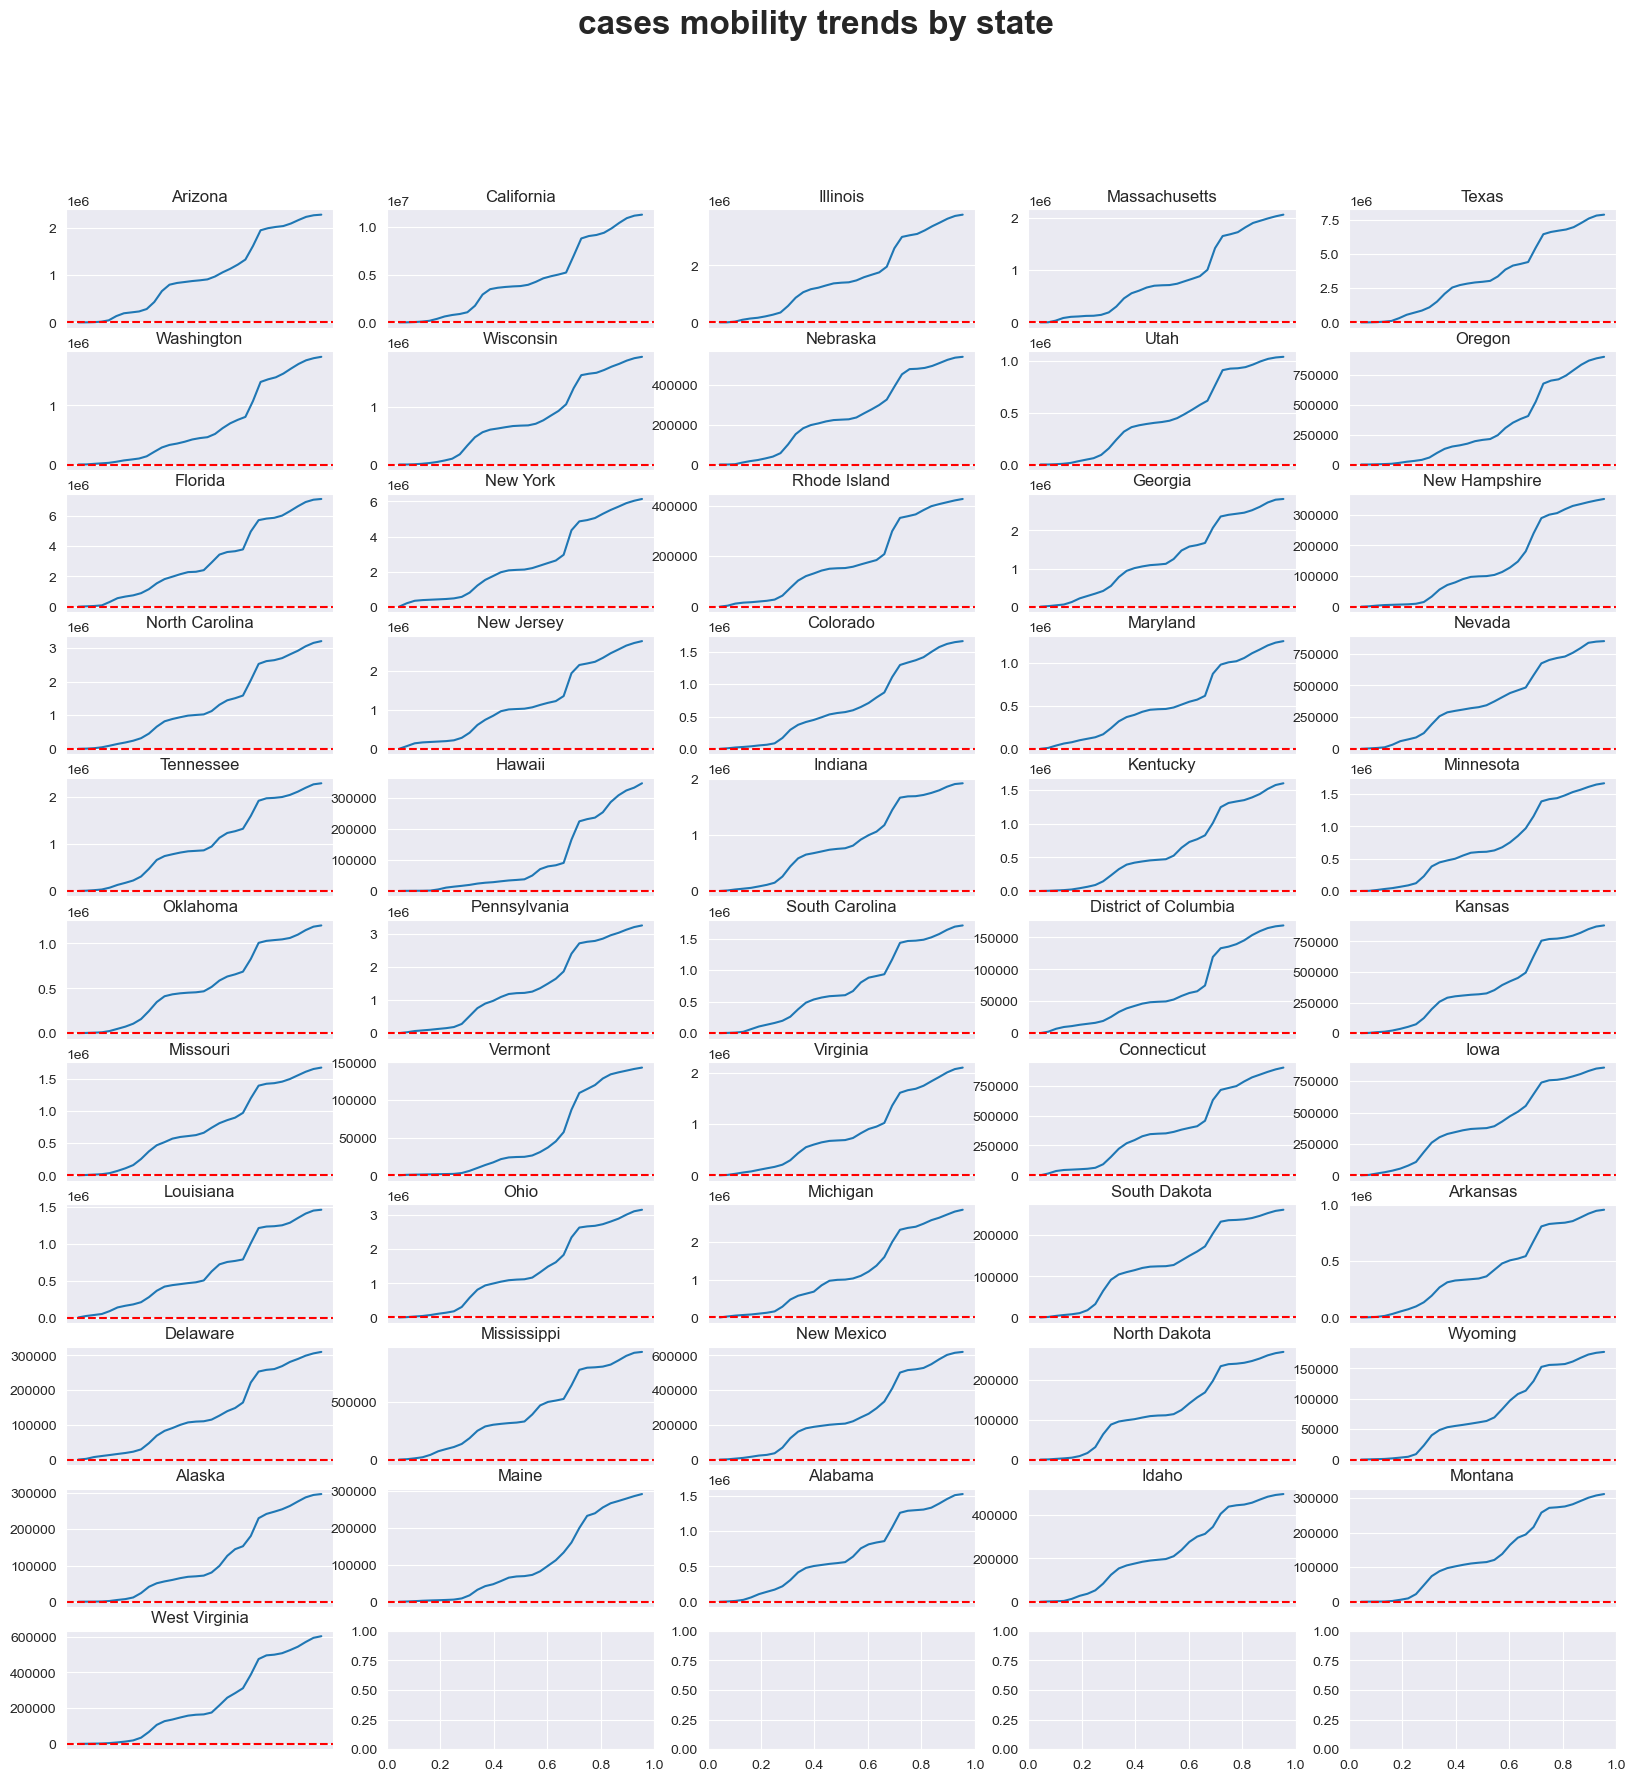

In [44]:
mobility_trends_by_category(data = valid_case, category = 'cases', plot_title = 'cases')

In [45]:
US_Mobility.head()

state county        date  retail_and_recreation  grocery_and_pharmacy  \
0   NaN    NaN  2020-02-15                    6.0                   2.0   
1   NaN    NaN  2020-02-16                    7.0                   1.0   
2   NaN    NaN  2020-02-17                    6.0                   0.0   
3   NaN    NaN  2020-02-18                    0.0                  -1.0   
4   NaN    NaN  2020-02-19                    2.0                   0.0   

   parks  transit_stations  workplaces  residential year_month  
0   15.0               3.0         2.0         -1.0    2020-02  
1   16.0               2.0         0.0         -1.0    2020-02  
2   28.0              -9.0       -24.0          5.0    2020-02  
3    6.0               1.0         0.0          1.0    2020-02  
4    8.0               1.0         1.0          0.0    2020-02

In [46]:
US_Mobility_noNAs = US_Mobility.dropna()
corr_res_work = np.corrcoef(US_Mobility_noNAs['residential'], US_Mobility_noNAs['workplaces'])
corr_res_work

array([[ 1.        , -0.82579813],
       [-0.82579813,  1.        ]])

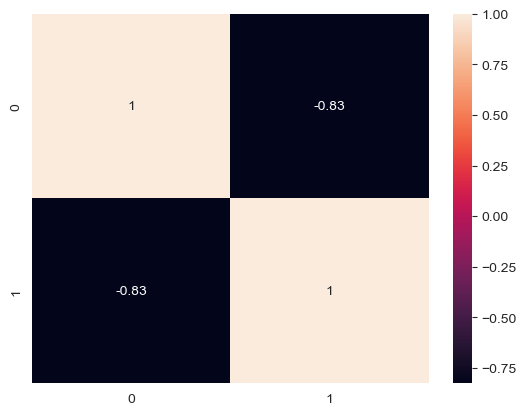

In [47]:
sns.heatmap(corr_res_work, annot = True);

## Mechanic Analysis based on Demand Modeling

In order to understand the mechanism of epidemic spread effect on the community mobility change, we modelled the demand-service relationship using the Double Quadratic Queue (DQQ) model.

By adopting the fluid queue derivation process, the model considers the two distinct stages and differentiates itself from a typical single-stage fluid queue model. The fluid queue modeling approach is a method used to analyze and model the behavior of queues in a dynamic setting, taking into account varying arrival and discharge rates. Newell's approach combines Taylor expansion, calculus, and geometric representation to derive an algebraic expression for the queue length at any given time. The DQQ model incorporates both geometric representation and algebraic expression. This fluid queue process helps visualize the relationships between arrival and discharge rates, queue length, and the passage of time. The ultimate goal of the subsequent derivation process is to obtain an algebraic expression for the queue length or cumulative change, which can be employed to study the queue's or system's behavior analytically.

![](figures/illustrations/dqq-curves.png)

The mathematical expression of the proposed DQQ model is provided in the [Appendix A](https://github.com/UCB-stat-159-s23/project-Group24/blob/main/Appendix%20A%20-%20DQQ.pdf). Typically, the following parameters are observable directly from time series datasets:
 $t_0$: the time when epidemic spread starts,
 $t_1$: the time when reach the lowest net flow rate,
 $t_2$: the time when the net flow rate become 0 first time after $t_0$, i.e. when the mobility reach the lowest point and start to recover,
 $t_3$: the time when the net flow rate reach the highest point, i.e. when the mobility was recovering at the highest speed,
 $t_4$: the time when the net flow rate reach and keep at 0, i.e. when the mobility reach the summit equilibrium after epidemic,
 $Q_max$: the change in mobility metrics at $t_2$, i.e. the worst damage caused by epidemic,

In the DQQ model applied in this project, we assume the net flow rate, $π(t)$, can be represented as double quadratic forms, as shown in the Figure below, which has three intersection points, $t_0$, $t_2$, and $t_4$, with the horizontal axis.

Function `util.find_ts` provide the process we applied to capture the critical time points and the worst damage caused by epidemic for each state described by the proposed DQQ model. The following codes show the data process and visualization of the DQQ model analysis results.

In [48]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator



In [49]:
from tools.utils import find_ts
pd.reset_option("mode.chained_assignment", None)
fig_path = 'figures/dqq_outputs'
out_put_path = 'output'
data_path = 'data'

df = pd.read_csv(f'{data_path}/2020_US_Region_Mobility_Report.csv',
                 usecols=['sub_region_1', 'date', 'transit_stations_percent_change_from_baseline'])

df.columns = ['state', 'date', 'change_rate']

df['date'] = df.apply(lambda x: x['date'][-5:], axis=1)

df['change_rate'].isnull().sum()

df_full = df.dropna(axis=0, how='any')

state_date = pd.pivot_table(df_full, index='date', columns='state', values='change_rate', aggfunc=np.mean)

US_avg = []

for date_pt, date_df in df_full.groupby('date'):
    US_avg.append(date_df['change_rate'].mean())

state_date['US'] = US_avg
state_date['US_rolling'] = state_date['US'].rolling(window=7).mean()

out_put = {

    'state': [],
    't0': [],
    'rate_t0': [],
    'day_index_t0': [],
    't1': [],
    'rate_t1': [],
    'day_index_t1': [],
    't2': [],
    'rate_t2': [],
    'day_index_t2': [],
    't3': [],
    'rate_t3': [],
    'day_index_t3': [],
    't4': [],
    'rate_t4': [],
    'day_index_t4': [],

}

for state in state_date.columns:
# for state in ['US', 'Arizona']:
    state_date[f'{state}_rolling'] = state_date[f'{state}'].rolling(window=7).mean()

    state_date['index_num'] = np.array(range(len(state_date)))

    plt.figure(figsize=(16, 12))

    if state != 'US':
        plt.plot(state_date[f'{state}_rolling'], label=f'{state}', color='orange')
        plt.plot(state_date[f'{state}'], alpha=0.1, color='orange')
    plt.plot(state_date['US_rolling'], label='US', color='b')
    plt.plot(state_date['US'], alpha=0.1, color='b')
    y_lim = [min(-60, state_date[f'{state}'].min() - 6), max(30, state_date[f'{state}'].max() + 6)]
    text_y = y_lim[0] + 2
    plt.ylim(y_lim)

    x_lim = [state_date['index_num'].min(), state_date['index_num'].max()]
    plt.xlim(x_lim)



    ts = find_ts(state_date[[f'{state}', f'{state}_rolling', 'index_num']], state)

    plt.scatter(state_date.loc[ts['t0']]['index_num'], ts['rate_t0'], color='r')
    plt.scatter(state_date.loc[ts['t1']]['index_num'], ts['rate_t1'], color='r')
    plt.scatter(state_date.loc[ts['t2']]['index_num'], ts['rate_t2'], color='r')
    plt.scatter(state_date.loc[ts['t3']]['index_num'], ts['rate_t3'], color='r')
    plt.scatter(state_date.loc[ts['t4']]['index_num'], ts['rate_t4'], color='r')


    plt.annotate(xy=(state_date.loc[ts['t0']]['index_num']-10, text_y),
                 text=f't0:{ts["t0"]}', rotation=90,
                 bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))

    plt.annotate(xy=(x_lim[0], ts['rate_t0'] - 4),
                 text=f'Q(t0)={np.round(ts["rate_t0"], 2)}%',
                 bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))

    plt.annotate(xy=(state_date.loc[ts['t1']]['index_num']+2.2, text_y),
                 text=f't1:{ts["t1"]}', rotation=90,
                 bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))

    plt.annotate(xy=(x_lim[0], ts['rate_t1'] + 1.6),
                 text=f'Q(t1)={np.round(ts["rate_t1"], 2)}%',
                 bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))

    plt.annotate(xy=(state_date.loc[ts['t2']]['index_num']+2.2, text_y),
                 text=f't2:{ts["t2"]}', rotation=90,
                 bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))

    plt.annotate(xy=(x_lim[0], ts['rate_t2'] + 1.6),
                 text=f'Q(t2)={np.round(ts["rate_t2"], 2)}%',
                 bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))

    plt.annotate(xy=(state_date.loc[ts['t3']]['index_num']+2.2, text_y),
                 text=f't3:{ts["t3"]}', rotation=90,
                 bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))

    plt.annotate(xy=(x_lim[0], ts['rate_t3'] - 4),
                 text=f'Q(t3)={np.round(ts["rate_t3"], 2)}%',
                 bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))

    plt.annotate(xy=(state_date.loc[ts['t4']]['index_num']+2.2, text_y),
                 text=f't4:{ts["t4"]}', rotation=90,
                 bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))

    plt.annotate(xy=(x_lim[0], ts['rate_t4'] - 4),
                 text=f'Q(t4)={np.round(ts["rate_t4"], 2)}%',
                 bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))

    x_major_locator = MultipleLocator(20)
    ax = plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    ax.set_xlabel(state_date.index.tolist())


    # dashline for anotations
    dashlline_x = [state_date.loc[ts['t0']]['index_num'],
                   state_date.loc[ts['t1']]['index_num'],
                   state_date.loc[ts['t2']]['index_num'],
                   state_date.loc[ts['t3']]['index_num'],
                   state_date.loc[ts['t4']]['index_num']]
    dashlline_y = [ts['rate_t0'], ts['rate_t1'], ts['rate_t2'], ts['rate_t3'], ts['rate_t4']]

    ax.vlines(dashlline_x, np.ones(len(dashlline_x)) * y_lim[0], dashlline_y,
              linestyles='dashed', colors='red')
    ax.hlines(dashlline_y, np.zeros(len(dashlline_x)), dashlline_x,
              linestyles='dashed', colors='red')

    plt.xticks(rotation=60)
    plt.legend()
    plt.title(f'Transit Stations Percent Change from Baseline of 2020: {state}')
    plt.xlabel('Date')
    plt.ylabel('Change Rate (%)')
    # plt.show()
    plt.savefig(f'{fig_path}/{state}.png', dpi=200)
    # print(f'Plotting {state}')
    plt.close()

    plt.figure(figsize=(12, 8))

    if state != 'US':
        plt.plot(state_date[f'{state}_rolling'], label=f'{state}', color='orange')
        plt.plot(state_date[f'{state}'], alpha=0.1, color='orange')
    plt.plot(state_date['US_rolling'], label='US', color='b')
    plt.plot(state_date['US'], alpha=0.1, color='b')

    plt.ylim(y_lim)
    plt.xlim(x_lim)
    x_major_locator = MultipleLocator(20)
    ax = plt.gca()




    ax.xaxis.set_major_locator(x_major_locator)
    ax.set_xlabel(state_date.index.tolist())
    plt.xticks(rotation=60)
    plt.legend()
    plt.title(f'Transit Stations Percent Change from Baseline of 2020: {state}')
    plt.xlabel('Date')
    plt.ylabel('Change Rate (%)')
    # plt.show()
    plt.savefig(f'{fig_path}/{state}_only_curve.png', dpi=200)
    # print(f'Plotting {state}')
    plt.close()

    dashlline_x = [state_date.loc[ts['t0']]['index_num'],
                   state_date.loc[ts['t1']]['index_num'],
                   state_date.loc[ts['t2']]['index_num'],
                   state_date.loc[ts['t3']]['index_num'],
                   state_date.loc[ts['t4']]['index_num']]

    out_put['state'].append(state)
    for t in ['t0', 't1', 't2', 't3', 't4']:
        out_put[t].append(ts[t])
        out_put[f'rate_{t}'].append(ts[f'rate_{t}'])
        out_put[f'day_index_{t}'].append(state_date.loc[ts[t]]['index_num'])

out_put_df = pd.DataFrame(out_put)
out_put_df.to_csv(f'{out_put_path}/dqq_transit_ts.csv')

The full output figure set for each states could be find in `figures/dqq_outputs`. Here are some examples:

![](figures/dqq_outputs/US.png)

The figure above indicates that the worst mobility drop (-35.51%) in US transit system , $t_2$, was reached in the middle April. Since then the recovery process start and reached the summited equilibrium (-6.52%) in the middle of June. The second wave of COVID-19 hit US in the interface of July and August, which caused the mobility to further drop and lead to a worse equilibrium later in November.



Let's compare the pattern of transit with other catagories:

In [50]:

classes = ['retail_and_recreation_percent_change_from_baseline',
           'grocery_and_pharmacy_percent_change_from_baseline',
           'parks_percent_change_from_baseline',
           'transit_stations_percent_change_from_baseline',
           'workplaces_percent_change_from_baseline',
           'residential_percent_change_from_baseline']

markers = [
    '.', '1', 's', '+', 'p', 'v'
]

df = pd.read_csv(f'{data_path}/2020_US_Region_Mobility_Report.csv',
                 usecols=['sub_region_1', 'date'] + classes)
df.columns = ['state', 'date'] + classes

df['date'] = df.apply(lambda x: x['date'][-5:], axis=1)

df_full = df.dropna(axis=0, how='any')

# for state in state_date.columns:
for state in ['US', 'Arizona']:

    plt.figure(figsize=(16, 12))

    for i in range(len(classes)):
        category = classes[i]
        marker = markers[i]
        state_date = pd.pivot_table(df_full, index='date', columns='state', values=category, aggfunc=np.mean)

        US_avg = []

        for date_pt, date_df in df_full.groupby('date'):
            US_avg.append(date_df[category].mean())

        state_date['US'] = US_avg
        state_date['US_rolling'] = state_date['US'].rolling(window=7).mean()

        state_date[f'{state}_rolling'] = state_date[f'{state}'].rolling(window=7).mean()

        state_date['index_num'] = np.array(range(len(state_date)))
        if category[0:7] == "transit":

            plt.plot(state_date[f'{state}_rolling'], label=f'{state}_{category.split("_percent")[0]}', linewidth=6)
            plt.plot(state_date[f'{state}'], alpha=0.06)

            ts = find_ts(state_date[[f'{state}', f'{state}_rolling', 'index_num']], state)

            plt.scatter(state_date.loc[ts['t0']]['index_num'], ts['rate_t0'], color='r', s=10)
            plt.scatter(state_date.loc[ts['t1']]['index_num'], ts['rate_t1'], color='r', s=10)
            plt.scatter(state_date.loc[ts['t2']]['index_num'], ts['rate_t2'], color='r', s=10)
            plt.scatter(state_date.loc[ts['t3']]['index_num'], ts['rate_t3'], color='r', s=10)
            plt.scatter(state_date.loc[ts['t4']]['index_num'], ts['rate_t4'], color='r', s=10)

            y_lim = [min(-60, state_date[f'{state}'].min() - 10), max(30, state_date[f'{state}'].max() + 80)]
            text_y = y_lim[0] + 3
            plt.ylim(y_lim)
            plt.annotate(xy=(state_date.loc[ts['t0']]['index_num'] - 10, text_y),
                         text=f't0:{ts["t0"]}', rotation=90,
                         bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))


            plt.annotate(xy=(state_date.loc[ts['t1']]['index_num'] + 2.2, text_y),
                         text=f't1:{ts["t1"]}', rotation=90,
                         bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))


            plt.annotate(xy=(state_date.loc[ts['t2']]['index_num'] + 2.2, text_y),
                         text=f't2:{ts["t2"]}', rotation=90,
                         bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))


            plt.annotate(xy=(state_date.loc[ts['t3']]['index_num'] + 2.2, text_y),
                         text=f't3:{ts["t3"]}', rotation=90,
                         bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))


            plt.annotate(xy=(state_date.loc[ts['t4']]['index_num'] + 2.2, text_y),
                         text=f't4:{ts["t4"]}', rotation=90,
                         bbox=dict(boxstyle='round,pad=0.5', fc='black', lw=1, alpha=0.12))

            # dashline for anotations
            dashlline_x = [state_date.loc[ts['t0']]['index_num'],
                           state_date.loc[ts['t1']]['index_num'],
                           state_date.loc[ts['t2']]['index_num'],
                           state_date.loc[ts['t3']]['index_num'],
                           state_date.loc[ts['t4']]['index_num']]

            dashlline_y = [ts['rate_t0'], ts['rate_t1'], ts['rate_t2'], ts['rate_t3'], ts['rate_t4']]
            x_major_locator = MultipleLocator(20)
            ax = plt.gca()

            ax.xaxis.set_major_locator(x_major_locator)
            ax.set_xlabel(state_date.index.tolist())
            ax.vlines(dashlline_x, np.ones(len(dashlline_x)) * y_lim[0], np.ones(len(dashlline_x)) * y_lim[1],
                      linestyles='dashed', colors='red')
        else:
            plt.plot(state_date[f'{state}_rolling'], label=f'{state}_{category.split("_percent")[0]}', marker=marker, markersize=10, markevery=10)
            plt.plot(state_date[f'{state}'], alpha=0.06)
            x_major_locator = MultipleLocator(20)
            ax = plt.gca()

            ax.xaxis.set_major_locator(x_major_locator)
            ax.set_xlabel(state_date.index.tolist())



    plt.xticks(rotation=60)
    plt.legend(loc='upper right')
    plt.title(f'Percent Change from Baseline of 2020: {state}')
    plt.xlabel('Date')
    plt.ylabel('Change Rate (%)')  # change font size: fontsize=20
    # plt.show()
    plt.savefig(f'{fig_path}/{state}_multi_category.png', dpi=200)
    plt.close()

Here is the plot of transit DQQ time points compare to other categories:

![](figures/dqq_outputs/US_multi_category.png)

As shown in the figure, the similar pattern of DQQ could be observed in all categories other than the residential and parks, which has increased value of citizen density since the remote working.

## Conclusion

This study contributes to the understanding of the effect of COVID-19 on U.S. mobility patterns by providing a comprehensive analysis of Google Community Mobility Reports data across various mobility categories. The findings demonstrate the pandemic's significant and varied impact on different aspects of mobility, with implications for policymakers and future research on the long-term consequences of the pandemic on human mobility.

Our analysis revealed that the retail and recreation, transit stations, and workplaces categories experienced the most substantial reductions in mobility during the pandemic. These sectors were highly vulnerable to the effects of social distancing measures and lockdowns. In contrast, the residential category saw increased mobility as people adapted to remote work and stay-at-home orders.

The time-series analysis demonstrated a strong association between mobility changes and key pandemic events, such as lockdowns and reopening phases. However, mobility patterns exhibited a high degree of variation across states and over time, reflecting differing policy responses and regional characteristics. This highlights the importance of considering regional variations when designing policies and interventions to address the pandemic's impact on mobility.

As the COVID-19 pandemic continues to evolve, it is crucial to monitor mobility trends and adapt policies accordingly. Future research could explore the long-term implications of the pandemic on mobility, such as potential shifts in work-from-home policies, urban planning, and transportation infrastructure. Additionally, examining the role of vaccination campaigns in shaping mobility trends can provide valuable insights for policymakers as they navigate the ongoing pandemic and its aftermath.

In order to understand the mechanism of epidemic spread on the community mobility, we modelled the demand-service relationship using the DQQ model which analyze disruptions and recoveries in complex systems in different contexts, such as the impact of natural disasters, pandemic outbreaks, and other major events. The model can help decision-makers and practitioners develop strategies to mitigate the impact of disruptions, improve the resilience of systems, and enhance the recovery process. Furthermore, the model can be used to evaluate the effectiveness of different policies and interventions aimed at minimizing disruptions and accelerating the recovery process.

In conclusion, this study offers a comprehensive analysis of the effect of COVID-19 on U.S. mobility patterns using Google Community Mobility Reports data. The findings underscore the pandemic's significant and multifaceted impact on various aspects of mobility, emphasizing the importance of tailored policy interventions and continued research to better understand and address the long-term consequences of the pandemic on human mobility.

## References
[1] Abraham C. Camba; Aileen L. Camba;  "The Effects of Restrictions in Economic Activity on The Spread of COVID-19 in The Philippines: Insights from Apple and Google Mobility Indicators",   THE JOURNAL OF ASIAN FINANCE, ECONOMICS AND BUSINESS,  2020.
[2] Eric Halford; Anthony Dixon; Graham Farrell; Nicolas Malleson; Nick Tilley;  "Crime and Coronavirus: Social Distancing, Lockdown, and The Mobility Elasticity of Crime",   CRIME SCIENCE,  2020.  (IF: 3)
[3] E Nurjani; K P Hafizha; D Purwanto; F Ulumia; M Widyastuti; A B Sekaranom; U Suarma;  "Carbon Emissions from The Transportation Sector During The Covid-19 Pandemic in The Special Region of Yogyakarta, Indonesia",   IOP CONFERENCE SERIES: EARTH AND ENVIRONMENTAL SCIENCE,  2021.
[4] Terje Trasberg; James Cheshire;  "Spatial and Social Disparities in The Decline of Activities During The COVID-19 Lockdown in Greater London",   URBAN STUDIES,  2021.  (IF: 3)
[5] Hafiz Suliman Munawar; Sara Imran Khan; Zakria Qadir; Abbas Z. Kouzani; M. A. Parvez Mahmud;  "Insight Into The Impact of COVID-19 on Australian Transportation Sector: An Economic and Community-Based Perspective",   SUSTAINABILITY,  2021.  (IF: 3)
[6] Yuqin Jiang; Xiao Huang; Zhenlong Li;  "Spatiotemporal Patterns of Human Mobility and Its Association with Land Use Types During COVID-19 in New York City",   ISPRS INT. J. GEO INF.,  2021.  (IF: 3)
[7] R Safitri; R Amelia;  "Forecasting Travel Patterns During COVID-19 Period Using Community Mobility Report Case Study: Bangka Belitung Province",   IOP CONFERENCE SERIES: EARTH AND ENVIRONMENTAL SCIENCE,  2021.
[8] Dina Lusiana Setyowati; Muhammad Khairul Nuryanto; Muhammad Sultan; Lisda Sofia; Suwardi Gunawan; Agus Wiranto;  "COMPUTER VISION SYNDROME AMONG ACADEMIC COMMUNITY IN MULAWARMAN UNIVERSITY, INDONESIA DURING WORK FROM HOME IN COVID-19 PANDEMIC",   ANNALS OF TROPICAL MEDICINE AND PUBLIC HEALTH,  2021.
[9] Aziman Abdullah;  "Lockdown Duration-based Impact Analysis Model of Residential Community Mobility Change and COVID-19 Cases in Malaysia",   2021 INTERNATIONAL CONFERENCE ON INNOVATION AND ...,  2021.
[10] Finn Petersen; Anna Errore; Pinar Karaca-Mandic;  "Lifting Statewide Mask Mandates and COVID-19 Cases: A Synthetic Control Study",   MEDICAL CARE,  2022.